<a href="https://colab.research.google.com/github/shivanshu1303/Simple-ML-Algos-Implemented/blob/main/Support%20Vector%20Machines%20Implemented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Here,I will implement `SVMs` i.e. 'Support Vector Machines'. These are used for both classification and regression tasks.

### Logically,an SVM model is quite similar to a simple linear regression model.SVM also tries to fit a straight line to the data in order to classify the data into categories.
### The biggest difference however is that while a linear regression model only fits a line, a SVM tries to fit a line, but at the same time, it also fits 'margins' to the line(that are at an equal distance from the line) so that there is some distance between the line and the points
### They are also different in that the classes in ML models are usually `0` and `1`,but here,the classes would be `1` and `-1`
### The margins ideally are drawn to go through the point nearest on each side of the line and the line is then modified to ensure that the distance between the margins is the largest possible. That is,of all the several lines that could be used, the best one is the one that has the largest marginal distance i.e. the largest distance between the margins.

Now, the line is $ w*x + b = 0 $  , and the margins are $ w*x+b=-1 $ and $w*x+b=1$.
The margins are chosen in a manner such that


$y=1$ for $w*x+b\geq1$

and similarly


$y=-1$ for $w*x+b\leq-1$.
#### Combining this into a single equation:

$y*(w*x+b)>=1$

## Now, we start the code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, we initialize the parameters that we will use

In [2]:
def initialize(X):
  n_samples,n_features=X.shape
  w=np.zeros((n_features),dtype=np.float64)
  b=0
  return w,b

Next, we code the `hinge loss` function that we will use to calculate the loss for a single sample. Adding all losses is how we will obtain the cost

In [3]:
def hinge_loss(X,y,w,b):
  return max(0,(1-(y)*(np.dot(w,X.T)+b)))

Now, we do the fit function

In [4]:
def fit(X,y,w,b,learning_rate,lambda_param,num_iters,verbose=True):
  m=X.shape[0]
  cost=0
  for i in range(num_iters):
    cost=0
    for j in range(m):
      loss=hinge_loss(X[j,:],y[j],w,b)
      cost+=loss
      if(loss!=0):
          w_gradient=(2*lambda_param*w)-(np.dot(y[j],X[j,:]))
          b_gradient=-y[j]
          w-=(learning_rate)*(w_gradient)
          b-=(learning_rate)*(b_gradient)

    if(verbose):
      if(i%100==0):
        print(f"At iteration number {i}, the cost is {cost}, and 'w' is {w} and 'b' is {b}")

  print(f"At learning rate:{learning_rate},lambda value:{lambda_param} and number of iterations:{num_iters}, the cost is {cost}")

  return w,b

Next, we move on to the predict function

In [5]:
def predict(X,y,w,b):
  preds=[]
  samples=X.shape[0]
  for i in range(samples):
    result=np.dot(w,X.T[:,i])+b
    preds.append(np.sign(result))
  accuracy(preds,y)
  return preds

After that, we do the accuracy function

In [6]:
def accuracy(y_pred,y_true):
  accuracy=np.mean(y_pred==y_true)
  print(f"The accuracy is: {100*accuracy} %")

Finally, we enter the data to be used to train the model and then train and test the model

In [7]:
X_train=np.array([(2,1),(3,1),(1,2),(2,2),(3,2),(1,3),(2,3),(3,3),(5,5),(6,5),(7,5),(5,6),(6,6),(7,6),(5,7),(6,7)])
y_train=np.array([-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1])
learning_rate=0.01
lambda_param=0.01
n_iters=10000

X_test=np.array([(1,1),(7,7)])
y_test=np.array([-1,1])

Visualizing the training points

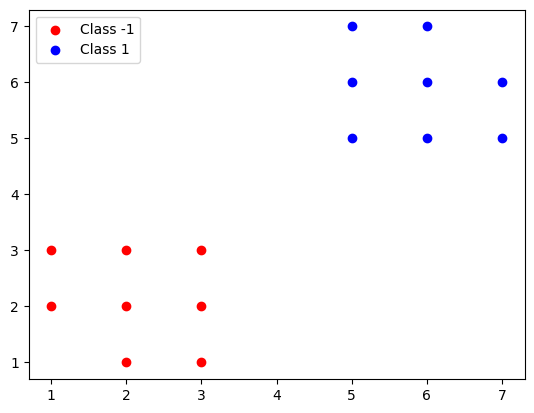

In [8]:
plt.scatter(X_train[y_train==-1,0],X_train[y_train==-1,1],color='red',label='Class -1')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='blue',label='Class 1')
plt.legend()

plt.show()

Visualizing the testing points

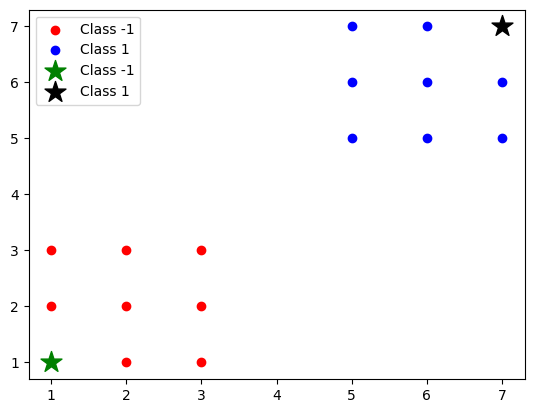

In [9]:
plt.scatter(X_train[y_train==-1,0],X_train[y_train==-1,1],color='red',label='Class -1')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='blue',label='Class 1')
plt.scatter(X_test[y_test==-1,0],X_test[y_test==-1,1],color='green',label='Class -1',marker='*',s=250)
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],color='black',label='Class 1',marker='*',s=250)
plt.legend()

plt.show()

In [10]:
w,b=initialize(X_train)
w,b=fit(X_train,y_train,w,b,learning_rate,lambda_param,n_iters,verbose=False)

At learning rate:0.01,lambda value:0.01 and number of iterations:10000, the cost is 0


In [11]:
answer=predict(X_test,y_test,w,b)
answer

The accuracy is: 100.0 %


[-1.0, 1.0]

## As you can see for this very simple dataset, our model performs quite well. We can now, tinker with hyperparameters to see how they impact our model.

In [12]:
learning_rates=[0.00001,0.00003,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3]#10 values
lambda_params=[0.00001,0.00003,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3]#10 values
n_iters=[10,30,100,300,1000,3000,10000,30000,100000,300000]#10 values

hyperparameter_set=[(learning_rate,lambda_param,n_iter) for learning_rate in learning_rates for lambda_param in lambda_params for n_iter in n_iters]

In [13]:
len(hyperparameter_set)

1000

In [14]:
hyperparameter_set[0:3]

[(1e-05, 1e-05, 10), (1e-05, 1e-05, 30), (1e-05, 1e-05, 100)]

In [ ]:
for (lr,lp,n_iters) in hyperparameter_set:
  w,b=initialize(X_train)
  w,b=fit(X_train,y_train,w,b,lr,lp,n_iters,verbose=False)

## I didnt run the above code block because it wouldnt finish in time but the output of this is below.
## Something you would notice is that for (relatively) larger values of the variables, the cost seems to be zero even with a smaller number of total iterations. So, that could be something.

In [ ]:
At learning rate:1e-05,lambda value:1e-05 and number of iterations:10, the cost is 15.83230000254672
At learning rate:1e-05,lambda value:1e-05 and number of iterations:30, the cost is 15.47230002493872
At learning rate:1e-05,lambda value:1e-05 and number of iterations:100, the cost is 14.212300284750686
At learning rate:1e-05,lambda value:1e-05 and number of iterations:300, the cost is 11.163419920935745
At learning rate:1e-05,lambda value:1e-05 and number of iterations:1000, the cost is 11.002041745824023
At learning rate:1e-05,lambda value:1e-05 and number of iterations:3000, the cost is 10.541178844525954
At learning rate:1e-05,lambda value:1e-05 and number of iterations:10000, the cost is 8.928302779037251
At learning rate:1e-05,lambda value:1e-05 and number of iterations:30000, the cost is 4.320120923439618
At learning rate:1e-05,lambda value:1e-05 and number of iterations:100000, the cost is 0.5845383795807455
At learning rate:1e-05,lambda value:1e-05 and number of iterations:300000, the cost is 0.13519622183624636
At learning rate:1e-05,lambda value:3e-05 and number of iterations:10, the cost is 15.83230000764016
At learning rate:1e-05,lambda value:3e-05 and number of iterations:30, the cost is 15.472300074816154
At learning rate:1e-05,lambda value:3e-05 and number of iterations:100, the cost is 14.212300854251886
At learning rate:1e-05,lambda value:3e-05 and number of iterations:300, the cost is 11.163419762807385
At learning rate:1e-05,lambda value:3e-05 and number of iterations:1000, the cost is 11.002045237461147
At learning rate:1e-05,lambda value:3e-05 and number of iterations:3000, the cost is 10.541176533582286
At learning rate:1e-05,lambda value:3e-05 and number of iterations:10000, the cost is 8.928348337081626
At learning rate:1e-05,lambda value:3e-05 and number of iterations:30000, the cost is 4.320082770396107
At learning rate:1e-05,lambda value:3e-05 and number of iterations:100000, the cost is 0.5845752702976248
At learning rate:1e-05,lambda value:3e-05 and number of iterations:300000, the cost is 0.13520866626359185
At learning rate:1e-05,lambda value:0.0001 and number of iterations:10, the cost is 15.832300025467202
At learning rate:1e-05,lambda value:0.0001 and number of iterations:30, the cost is 15.472300249387121
At learning rate:1e-05,lambda value:0.0001 and number of iterations:100, the cost is 14.212302847504183
At learning rate:1e-05,lambda value:0.0001 and number of iterations:300, the cost is 11.163419209359652
At learning rate:1e-05,lambda value:0.0001 and number of iterations:1000, the cost is 11.002057458150764
At learning rate:1e-05,lambda value:0.0001 and number of iterations:3000, the cost is 10.541168445281409
At learning rate:1e-05,lambda value:0.0001 and number of iterations:10000, the cost is 8.928404477586977
At learning rate:1e-05,lambda value:0.0001 and number of iterations:30000, the cost is 4.320214012773642
At learning rate:1e-05,lambda value:0.0001 and number of iterations:100000, the cost is 0.5845842295292947
At learning rate:1e-05,lambda value:0.0001 and number of iterations:300000, the cost is 0.13515225163592204
At learning rate:1e-05,lambda value:0.0003 and number of iterations:10, the cost is 15.832300076401575
At learning rate:1e-05,lambda value:0.0003 and number of iterations:30, the cost is 15.472300748160897
At learning rate:1e-05,lambda value:0.0003 and number of iterations:100, the cost is 14.212308542494446
At learning rate:1e-05,lambda value:0.0003 and number of iterations:300, the cost is 11.16341762809354
At learning rate:1e-05,lambda value:0.0003 and number of iterations:1000, the cost is 11.001352406722702
At learning rate:1e-05,lambda value:0.0003 and number of iterations:3000, the cost is 10.54125385456756
At learning rate:1e-05,lambda value:0.0003 and number of iterations:10000, the cost is 8.928423373141063
At learning rate:1e-05,lambda value:0.0003 and number of iterations:30000, the cost is 4.319683489779683
At learning rate:1e-05,lambda value:0.0003 and number of iterations:100000, the cost is 0.5845813491110801
At learning rate:1e-05,lambda value:0.0003 and number of iterations:300000, the cost is 0.1352696212739235
At learning rate:1e-05,lambda value:0.001 and number of iterations:10, the cost is 15.832300254671747
At learning rate:1e-05,lambda value:0.001 and number of iterations:30, the cost is 15.472302493864204
At learning rate:1e-05,lambda value:0.001 and number of iterations:100, the cost is 14.212328474770283
At learning rate:1e-05,lambda value:0.001 and number of iterations:300, the cost is 11.163412093815342
At learning rate:1e-05,lambda value:0.001 and number of iterations:1000, the cost is 11.002095435679683
At learning rate:1e-05,lambda value:0.001 and number of iterations:3000, the cost is 10.541234450206824
At learning rate:1e-05,lambda value:0.001 and number of iterations:10000, the cost is 8.928504770813227
At learning rate:1e-05,lambda value:0.001 and number of iterations:30000, the cost is 4.320185024780079
At learning rate:1e-05,lambda value:0.001 and number of iterations:100000, the cost is 0.5847819407332175
At learning rate:1e-05,lambda value:0.001 and number of iterations:300000, the cost is 0.13551170027781012
At learning rate:1e-05,lambda value:0.003 and number of iterations:10, the cost is 15.832300764013736
At learning rate:1e-05,lambda value:0.003 and number of iterations:30, the cost is 15.47230748154581
At learning rate:1e-05,lambda value:0.003 and number of iterations:100, the cost is 14.212385422500596
At learning rate:1e-05,lambda value:0.003 and number of iterations:300, the cost is 11.163396282824378
At learning rate:1e-05,lambda value:0.003 and number of iterations:1000, the cost is 11.002026308765462
At learning rate:1e-05,lambda value:0.003 and number of iterations:3000, the cost is 10.541343334548642
At learning rate:1e-05,lambda value:0.003 and number of iterations:10000, the cost is 8.9281987993654
At learning rate:1e-05,lambda value:0.003 and number of iterations:30000, the cost is 4.322406883060791
At learning rate:1e-05,lambda value:0.003 and number of iterations:100000, the cost is 0.5851499736968737
At learning rate:1e-05,lambda value:0.003 and number of iterations:300000, the cost is 0.13608774464227613
At learning rate:1e-05,lambda value:0.01 and number of iterations:10, the cost is 15.832302546694828
At learning rate:1e-05,lambda value:0.01 and number of iterations:30, the cost is 15.472324937940096
At learning rate:1e-05,lambda value:0.01 and number of iterations:100, the cost is 14.212584720550545
At learning rate:1e-05,lambda value:0.01 and number of iterations:300, the cost is 11.162752897521692
At learning rate:1e-05,lambda value:0.01 and number of iterations:1000, the cost is 11.002124315181714
At learning rate:1e-05,lambda value:0.01 and number of iterations:3000, the cost is 10.541724256958942
At learning rate:1e-05,lambda value:0.01 and number of iterations:10000, the cost is 8.93018693783891
At learning rate:1e-05,lambda value:0.01 and number of iterations:30000, the cost is 4.327751736563622
At learning rate:1e-05,lambda value:0.01 and number of iterations:100000, the cost is 0.5865259713613415
At learning rate:1e-05,lambda value:0.01 and number of iterations:300000, the cost is 0.13812136446491152
At learning rate:1e-05,lambda value:0.03 and number of iterations:10, the cost is 15.83230763993346
At learning rate:1e-05,lambda value:0.03 and number of iterations:30, the cost is 15.472374809141192
At learning rate:1e-05,lambda value:0.03 and number of iterations:100, the cost is 14.213153980678003
At learning rate:1e-05,lambda value:0.03 and number of iterations:300, the cost is 11.163522831954468
At learning rate:1e-05,lambda value:0.03 and number of iterations:1000, the cost is 11.002452532781081
At learning rate:1e-05,lambda value:0.03 and number of iterations:3000, the cost is 10.54264127186335
At learning rate:1e-05,lambda value:0.03 and number of iterations:10000, the cost is 8.93382568675469
At learning rate:1e-05,lambda value:0.03 and number of iterations:30000, the cost is 4.342963801982563
At learning rate:1e-05,lambda value:0.03 and number of iterations:100000, the cost is 0.5906307906953576
At learning rate:1e-05,lambda value:0.03 and number of iterations:300000, the cost is 0.14382590964826925
At learning rate:1e-05,lambda value:0.1 and number of iterations:10, the cost is 15.832325464683034
At learning rate:1e-05,lambda value:0.1 and number of iterations:30, the cost is 15.472549309226036
At learning rate:1e-05,lambda value:0.1 and number of iterations:100, the cost is 14.21514449240925
At learning rate:1e-05,lambda value:0.1 and number of iterations:300, the cost is 11.163669618905978
At learning rate:1e-05,lambda value:0.1 and number of iterations:1000, the cost is 11.003446767318904
At learning rate:1e-05,lambda value:0.1 and number of iterations:3000, the cost is 10.545127118176438
At learning rate:1e-05,lambda value:0.1 and number of iterations:10000, the cost is 8.946487761366846
At learning rate:1e-05,lambda value:0.1 and number of iterations:30000, the cost is 4.3961141037331934
At learning rate:1e-05,lambda value:0.1 and number of iterations:100000, the cost is 0.604243407417759
At learning rate:1e-05,lambda value:0.1 and number of iterations:300000, the cost is 0.1642731111623834
At learning rate:1e-05,lambda value:0.3 and number of iterations:10, the cost is 15.832376378950618
At learning rate:1e-05,lambda value:0.3 and number of iterations:30, the cost is 15.473047460162382
At learning rate:1e-05,lambda value:0.3 and number of iterations:100, the cost is 14.220815431503135
At learning rate:1e-05,lambda value:0.3 and number of iterations:300, the cost is 11.165108935194407
At learning rate:1e-05,lambda value:0.3 and number of iterations:1000, the cost is 11.00624370336757
At learning rate:1e-05,lambda value:0.3 and number of iterations:3000, the cost is 10.555139596030944
At learning rate:1e-05,lambda value:0.3 and number of iterations:10000, the cost is 8.983085072730578
At learning rate:1e-05,lambda value:0.3 and number of iterations:30000, the cost is 4.548430953675966
At learning rate:1e-05,lambda value:0.3 and number of iterations:100000, the cost is 0.6379492780525866
At learning rate:1e-05,lambda value:0.3 and number of iterations:300000, the cost is 0.2224070786053951
At learning rate:3e-05,lambda value:1e-05 and number of iterations:10, the cost is 15.496900022920482
At learning rate:3e-05,lambda value:1e-05 and number of iterations:30, the cost is 14.41690022444846
At learning rate:3e-05,lambda value:1e-05 and number of iterations:100, the cost is 11.165760415605
At learning rate:3e-05,lambda value:1e-05 and number of iterations:300, the cost is 11.028139699732607
At learning rate:3e-05,lambda value:1e-05 and number of iterations:1000, the cost is 10.54426885223758
At learning rate:3e-05,lambda value:1e-05 and number of iterations:3000, the cost is 9.1619259970562
At learning rate:3e-05,lambda value:1e-05 and number of iterations:10000, the cost is 4.323210943682247
At learning rate:3e-05,lambda value:1e-05 and number of iterations:30000, the cost is 0.6443887769538614
At learning rate:3e-05,lambda value:1e-05 and number of iterations:100000, the cost is 0.1354162530295988
At learning rate:3e-05,lambda value:1e-05 and number of iterations:300000, the cost is 0
At learning rate:3e-05,lambda value:3e-05 and number of iterations:10, the cost is 15.496900068761436
At learning rate:3e-05,lambda value:3e-05 and number of iterations:30, the cost is 14.416900673345248
At learning rate:3e-05,lambda value:3e-05 and number of iterations:100, the cost is 11.165761246814213
At learning rate:3e-05,lambda value:3e-05 and number of iterations:300, the cost is 11.028139099199448
At learning rate:3e-05,lambda value:3e-05 and number of iterations:1000, the cost is 10.544266556734751
At learning rate:3e-05,lambda value:3e-05 and number of iterations:3000, the cost is 9.16191799116168
At learning rate:3e-05,lambda value:3e-05 and number of iterations:10000, the cost is 4.32317283109909
At learning rate:3e-05,lambda value:3e-05 and number of iterations:30000, the cost is 0.6446707318943363
At learning rate:3e-05,lambda value:3e-05 and number of iterations:100000, the cost is 0.13548875717200248
At learning rate:3e-05,lambda value:3e-05 and number of iterations:300000, the cost is 0
At learning rate:3e-05,lambda value:0.0001 and number of iterations:10, the cost is 15.496900229204728
At learning rate:3e-05,lambda value:0.0001 and number of iterations:30, the cost is 14.416902244482694
At learning rate:3e-05,lambda value:0.0001 and number of iterations:100, the cost is 11.165764156038179
At learning rate:3e-05,lambda value:0.0001 and number of iterations:300, the cost is 11.028136997350506
At learning rate:3e-05,lambda value:0.0001 and number of iterations:1000, the cost is 10.544258522391617
At learning rate:3e-05,lambda value:0.0001 and number of iterations:3000, the cost is 9.161889970595785
At learning rate:3e-05,lambda value:0.0001 and number of iterations:10000, the cost is 4.323549435558222
At learning rate:3e-05,lambda value:0.0001 and number of iterations:30000, the cost is 0.6446424240592388
At learning rate:3e-05,lambda value:0.0001 and number of iterations:100000, the cost is 0.13541256426073556
At learning rate:3e-05,lambda value:0.0001 and number of iterations:300000, the cost is 0
At learning rate:3e-05,lambda value:0.0003 and number of iterations:10, the cost is 15.496900687613786
At learning rate:3e-05,lambda value:0.0003 and number of iterations:30, the cost is 14.41690673343545
At learning rate:3e-05,lambda value:0.0003 and number of iterations:100, the cost is 11.165772468035673
At learning rate:3e-05,lambda value:0.0003 and number of iterations:300, the cost is 11.02813099191372
At learning rate:3e-05,lambda value:0.0003 and number of iterations:1000, the cost is 10.54439376985001
At learning rate:3e-05,lambda value:0.0003 and number of iterations:3000, the cost is 9.161822062163415
At learning rate:3e-05,lambda value:0.0003 and number of iterations:10000, the cost is 4.323678306567388
At learning rate:3e-05,lambda value:0.0003 and number of iterations:30000, the cost is 0.644677269309097
At learning rate:3e-05,lambda value:0.0003 and number of iterations:100000, the cost is 0.1357178673083146
At learning rate:3e-05,lambda value:0.0003 and number of iterations:300000, the cost is 0
At learning rate:3e-05,lambda value:0.001 and number of iterations:10, the cost is 15.496902292041204
At learning rate:3e-05,lambda value:0.001 and number of iterations:30, the cost is 14.416922444637422
At learning rate:3e-05,lambda value:0.001 and number of iterations:100, the cost is 11.165801559198913
At learning rate:3e-05,lambda value:0.001 and number of iterations:300, the cost is 11.028155464691029
At learning rate:3e-05,lambda value:0.001 and number of iterations:1000, the cost is 10.54466521533092
At learning rate:3e-05,lambda value:0.001 and number of iterations:3000, the cost is 9.162039700627032
At learning rate:3e-05,lambda value:0.001 and number of iterations:10000, the cost is 4.3240137611833855
At learning rate:3e-05,lambda value:0.001 and number of iterations:30000, the cost is 0.6445699491973764
At learning rate:3e-05,lambda value:0.001 and number of iterations:100000, the cost is 0.1359188727233347
At learning rate:3e-05,lambda value:0.001 and number of iterations:300000, the cost is 0
At learning rate:3e-05,lambda value:0.003 and number of iterations:10, the cost is 15.49690687608283
At learning rate:3e-05,lambda value:0.003 and number of iterations:30, the cost is 14.416967332648829
At learning rate:3e-05,lambda value:0.003 and number of iterations:100, the cost is 11.165884669711561
At learning rate:3e-05,lambda value:0.003 and number of iterations:300, the cost is 11.026247110367072
At learning rate:3e-05,lambda value:0.003 and number of iterations:1000, the cost is 10.544435650596668
At learning rate:3e-05,lambda value:0.003 and number of iterations:3000, the cost is 9.162260832715846
At learning rate:3e-05,lambda value:0.003 and number of iterations:10000, the cost is 4.32567296216319
At learning rate:3e-05,lambda value:0.003 and number of iterations:30000, the cost is 0.6448816863280125
At learning rate:3e-05,lambda value:0.003 and number of iterations:100000, the cost is 0.13623734849159197
At learning rate:3e-05,lambda value:0.003 and number of iterations:300000, the cost is 0
At learning rate:3e-05,lambda value:0.01 and number of iterations:10, the cost is 15.496922919800385
At learning rate:3e-05,lambda value:0.01 and number of iterations:30, the cost is 14.41712442742358
At learning rate:3e-05,lambda value:0.01 and number of iterations:100, the cost is 11.166175473731057
At learning rate:3e-05,lambda value:0.01 and number of iterations:300, the cost is 11.0283496642754
At learning rate:3e-05,lambda value:0.01 and number of iterations:1000, the cost is 10.545033352070671
At learning rate:3e-05,lambda value:0.01 and number of iterations:3000, the cost is 9.163536352005204
At learning rate:3e-05,lambda value:0.01 and number of iterations:10000, the cost is 4.331044294264677
At learning rate:3e-05,lambda value:0.01 and number of iterations:30000, the cost is 0.6460914977923147
At learning rate:3e-05,lambda value:0.01 and number of iterations:100000, the cost is 0.13853120584789957
At learning rate:3e-05,lambda value:0.01 and number of iterations:300000, the cost is 0
At learning rate:3e-05,lambda value:0.03 and number of iterations:10, the cost is 15.496968755323728
At learning rate:3e-05,lambda value:0.03 and number of iterations:30, the cost is 14.417573155958832
At learning rate:3e-05,lambda value:0.03 and number of iterations:100, the cost is 11.165327226477668
At learning rate:3e-05,lambda value:0.03 and number of iterations:300, the cost is 11.02876861566222
At learning rate:3e-05,lambda value:0.03 and number of iterations:1000, the cost is 10.545924494371766
At learning rate:3e-05,lambda value:0.03 and number of iterations:3000, the cost is 9.166744777107647
At learning rate:3e-05,lambda value:0.03 and number of iterations:10000, the cost is 4.346114737171419
At learning rate:3e-05,lambda value:0.03 and number of iterations:30000, the cost is 0.6489054013972169
At learning rate:3e-05,lambda value:0.03 and number of iterations:100000, the cost is 0.14408623546341515
At learning rate:3e-05,lambda value:0.03 and number of iterations:300000, the cost is 0
At learning rate:3e-05,lambda value:0.1 and number of iterations:10, the cost is 15.497129136851854
At learning rate:3e-05,lambda value:0.1 and number of iterations:30, the cost is 14.419142380487148
At learning rate:3e-05,lambda value:0.1 and number of iterations:100, the cost is 11.166435255497817
At learning rate:3e-05,lambda value:0.1 and number of iterations:300, the cost is 11.029750790462613
At learning rate:3e-05,lambda value:0.1 and number of iterations:1000, the cost is 10.549115428324706
At learning rate:3e-05,lambda value:0.1 and number of iterations:3000, the cost is 9.177950381145275
At learning rate:3e-05,lambda value:0.1 and number of iterations:10000, the cost is 4.3992471951302745
At learning rate:3e-05,lambda value:0.1 and number of iterations:30000, the cost is 0.6586487256845559
At learning rate:3e-05,lambda value:0.1 and number of iterations:100000, the cost is 0.1643849314591228
At learning rate:3e-05,lambda value:0.1 and number of iterations:300000, the cost is 0
At learning rate:3e-05,lambda value:0.3 and number of iterations:10, the cost is 15.497587003134637
At learning rate:3e-05,lambda value:0.3 and number of iterations:30, the cost is 14.423614542119596
At learning rate:3e-05,lambda value:0.3 and number of iterations:100, the cost is 11.175106113973655
At learning rate:3e-05,lambda value:0.3 and number of iterations:300, the cost is 11.030510415202414
At learning rate:3e-05,lambda value:0.3 and number of iterations:1000, the cost is 10.558619502213263
At learning rate:3e-05,lambda value:0.3 and number of iterations:3000, the cost is 9.210502965273054
At learning rate:3e-05,lambda value:0.3 and number of iterations:10000, the cost is 4.551789065462556
At learning rate:3e-05,lambda value:0.3 and number of iterations:30000, the cost is 0.7303813311631611
At learning rate:3e-05,lambda value:0.3 and number of iterations:100000, the cost is 0.22269278073595
At learning rate:3e-05,lambda value:0.3 and number of iterations:300000, the cost is 0
At learning rate:0.0001,lambda value:1e-05 and number of iterations:10, the cost is 14.323000254671975
At learning rate:0.0001,lambda value:1e-05 and number of iterations:30, the cost is 11.191900894741721
At learning rate:0.0001,lambda value:1e-05 and number of iterations:100, the cost is 11.016599684628897
At learning rate:0.0001,lambda value:1e-05 and number of iterations:300, the cost is 10.548605822835642
At learning rate:0.0001,lambda value:1e-05 and number of iterations:1000, the cost is 8.936022849661283
At learning rate:0.0001,lambda value:1e-05 and number of iterations:3000, the cost is 4.334081014180212
At learning rate:0.0001,lambda value:1e-05 and number of iterations:10000, the cost is 0.5876262796488638
At learning rate:0.0001,lambda value:1e-05 and number of iterations:30000, the cost is 0.13653046925248935
At learning rate:0.0001,lambda value:1e-05 and number of iterations:100000, the cost is 0
At learning rate:0.0001,lambda value:1e-05 and number of iterations:300000, the cost is 0
At learning rate:0.0001,lambda value:3e-05 and number of iterations:10, the cost is 14.323000764015774
At learning rate:0.0001,lambda value:3e-05 and number of iterations:30, the cost is 11.19190268422349
At learning rate:0.0001,lambda value:3e-05 and number of iterations:100, the cost is 11.01659905388847
At learning rate:0.0001,lambda value:3e-05 and number of iterations:300, the cost is 10.548617468394452
At learning rate:0.0001,lambda value:3e-05 and number of iterations:1000, the cost is 8.936068547552848
At learning rate:0.0001,lambda value:3e-05 and number of iterations:3000, the cost is 4.3340430426886805
At learning rate:0.0001,lambda value:3e-05 and number of iterations:10000, the cost is 0.5886059574113527
At learning rate:0.0001,lambda value:3e-05 and number of iterations:30000, the cost is 0.13669138788447555
At learning rate:0.0001,lambda value:3e-05 and number of iterations:100000, the cost is 0
At learning rate:0.0001,lambda value:3e-05 and number of iterations:300000, the cost is 0
At learning rate:0.0001,lambda value:0.0001 and number of iterations:10, the cost is 14.323002546717483
At learning rate:0.0001,lambda value:0.0001 and number of iterations:30, the cost is 11.191908947392097
At learning rate:0.0001,lambda value:0.0001 and number of iterations:100, the cost is 11.01659684631566
At learning rate:0.0001,lambda value:0.0001 and number of iterations:300, the cost is 10.548658226669113
At learning rate:0.0001,lambda value:0.0001 and number of iterations:1000, the cost is 8.936228491823117
At learning rate:0.0001,lambda value:0.0001 and number of iterations:3000, the cost is 4.334751152642009
At learning rate:0.0001,lambda value:0.0001 and number of iterations:10000, the cost is 0.5877629016822157
At learning rate:0.0001,lambda value:0.0001 and number of iterations:30000, the cost is 0.13630473411907174
At learning rate:0.0001,lambda value:0.0001 and number of iterations:100000, the cost is 0
At learning rate:0.0001,lambda value:0.0001 and number of iterations:300000, the cost is 0
At learning rate:0.0001,lambda value:0.0003 and number of iterations:10, the cost is 14.323007640137346
At learning rate:0.0001,lambda value:0.0003 and number of iterations:30, the cost is 11.191926842008868
At learning rate:0.0001,lambda value:0.0003 and number of iterations:100, the cost is 11.016590539124927
At learning rate:0.0001,lambda value:0.0003 and number of iterations:300, the cost is 10.548774676798539
At learning rate:0.0001,lambda value:0.0003 and number of iterations:1000, the cost is 8.943464901563116
At learning rate:0.0001,lambda value:0.0003 and number of iterations:3000, the cost is 4.335230422466106
At learning rate:0.0001,lambda value:0.0003 and number of iterations:10000, the cost is 0.5876886939049792
At learning rate:0.0001,lambda value:0.0003 and number of iterations:30000, the cost is 0.13729086992337036
At learning rate:0.0001,lambda value:0.0003 and number of iterations:100000, the cost is 0
At learning rate:0.0001,lambda value:0.0003 and number of iterations:300000, the cost is 0
At learning rate:0.0001,lambda value:0.001 and number of iterations:10, the cost is 14.323025466948287
At learning rate:0.0001,lambda value:0.001 and number of iterations:30, the cost is 11.191989471409675
At learning rate:0.0001,lambda value:0.001 and number of iterations:100, the cost is 11.016568465825713
At learning rate:0.0001,lambda value:0.001 and number of iterations:300, the cost is 10.55638789224527
At learning rate:0.0001,lambda value:0.001 and number of iterations:1000, the cost is 8.9431496843017
At learning rate:0.0001,lambda value:0.001 and number of iterations:3000, the cost is 4.335601418439366
At learning rate:0.0001,lambda value:0.001 and number of iterations:10000, the cost is 0.587930815418741
At learning rate:0.0001,lambda value:0.001 and number of iterations:30000, the cost is 0.13694147467929918
At learning rate:0.0001,lambda value:0.001 and number of iterations:100000, the cost is 0
At learning rate:0.0001,lambda value:0.001 and number of iterations:300000, the cost is 0
At learning rate:0.0001,lambda value:0.003 and number of iterations:10, the cost is 14.323076399334614
At learning rate:0.0001,lambda value:0.003 and number of iterations:30, the cost is 11.19216839748825
At learning rate:0.0001,lambda value:0.003 and number of iterations:100, the cost is 11.016505391153466
At learning rate:0.0001,lambda value:0.003 and number of iterations:300, the cost is 10.55616366267207
At learning rate:0.0001,lambda value:0.003 and number of iterations:1000, the cost is 8.94394896569775
At learning rate:0.0001,lambda value:0.003 and number of iterations:3000, the cost is 4.33690420559377
At learning rate:0.0001,lambda value:0.003 and number of iterations:10000, the cost is 0.5890920019318089
At learning rate:0.0001,lambda value:0.003 and number of iterations:30000, the cost is 0.13704012638899554
At learning rate:0.0001,lambda value:0.003 and number of iterations:100000, the cost is 0
At learning rate:0.0001,lambda value:0.003 and number of iterations:300000, the cost is 0
At learning rate:0.0001,lambda value:0.01 and number of iterations:10, the cost is 14.323254646830344
At learning rate:0.0001,lambda value:0.01 and number of iterations:30, the cost is 11.192794463025889
At learning rate:0.0001,lambda value:0.01 and number of iterations:100, the cost is 11.016284630330725
At learning rate:0.0001,lambda value:0.01 and number of iterations:300, the cost is 10.556384966621401
At learning rate:0.0001,lambda value:0.01 and number of iterations:1000, the cost is 8.944196420501727
At learning rate:0.0001,lambda value:0.01 and number of iterations:3000, the cost is 4.342313829968511
At learning rate:0.0001,lambda value:0.01 and number of iterations:10000, the cost is 0.5900784412483628
At learning rate:0.0001,lambda value:0.01 and number of iterations:30000, the cost is 0.1400441690546801
At learning rate:0.0001,lambda value:0.01 and number of iterations:100000, the cost is 0
At learning rate:0.0001,lambda value:0.01 and number of iterations:300000, the cost is 0
At learning rate:0.0001,lambda value:0.03 and number of iterations:10, the cost is 14.323763789506174
At learning rate:0.0001,lambda value:0.03 and number of iterations:30, the cost is 11.19470627503929
At learning rate:0.0001,lambda value:0.03 and number of iterations:100, the cost is 11.017353014395642
At learning rate:0.0001,lambda value:0.03 and number of iterations:300, the cost is 10.556535094633233
At learning rate:0.0001,lambda value:0.03 and number of iterations:1000, the cost is 8.94878468706464
At learning rate:0.0001,lambda value:0.03 and number of iterations:3000, the cost is 4.35702692971619
At learning rate:0.0001,lambda value:0.03 and number of iterations:10000, the cost is 0.594550379165264
At learning rate:0.0001,lambda value:0.03 and number of iterations:30000, the cost is 0.1459588333675339
At learning rate:0.0001,lambda value:0.03 and number of iterations:100000, the cost is 0
At learning rate:0.0001,lambda value:0.03 and number of iterations:300000, the cost is 0
At learning rate:0.0001,lambda value:0.1 and number of iterations:10, the cost is 14.325544204688379
At learning rate:0.0001,lambda value:0.1 and number of iterations:30, the cost is 11.204257905479698
At learning rate:0.0001,lambda value:0.1 and number of iterations:100, the cost is 11.01853984050132
At learning rate:0.0001,lambda value:0.1 and number of iterations:300, the cost is 10.560563733136334
At learning rate:0.0001,lambda value:0.1 and number of iterations:1000, the cost is 8.9613799557872
At learning rate:0.0001,lambda value:0.1 and number of iterations:3000, the cost is 4.4109683470921865
At learning rate:0.0001,lambda value:0.1 and number of iterations:10000, the cost is 0.6083898732734978
At learning rate:0.0001,lambda value:0.1 and number of iterations:30000, the cost is 0.16621802472394842
At learning rate:0.0001,lambda value:0.1 and number of iterations:100000, the cost is 0
At learning rate:0.0001,lambda value:0.1 and number of iterations:300000, the cost is 0
At learning rate:0.0001,lambda value:0.3 and number of iterations:10, the cost is 14.330617555223286
At learning rate:0.0001,lambda value:0.3 and number of iterations:30, the cost is 11.209654678853994
At learning rate:0.0001,lambda value:0.3 and number of iterations:100, the cost is 11.021348144956347
At learning rate:0.0001,lambda value:0.3 and number of iterations:300, the cost is 10.570337138647801
At learning rate:0.0001,lambda value:0.3 and number of iterations:1000, the cost is 8.998214474771217
At learning rate:0.0001,lambda value:0.3 and number of iterations:3000, the cost is 4.563826990956203
At learning rate:0.0001,lambda value:0.3 and number of iterations:10000, the cost is 0.6415825694423041
At learning rate:0.0001,lambda value:0.3 and number of iterations:30000, the cost is 0.2244051897019368
At learning rate:0.0001,lambda value:0.3 and number of iterations:100000, the cost is 0
At learning rate:0.0001,lambda value:0.3 and number of iterations:300000, the cost is 0
At learning rate:0.0003,lambda value:1e-05 and number of iterations:10, the cost is 11.297601293674013
At learning rate:0.0003,lambda value:1e-05 and number of iterations:30, the cost is 11.051401597779279
At learning rate:0.0003,lambda value:1e-05 and number of iterations:100, the cost is 10.587605785067819
At learning rate:0.0003,lambda value:1e-05 and number of iterations:300, the cost is 9.205396135388565
At learning rate:0.0003,lambda value:1e-05 and number of iterations:1000, the cost is 4.366681213247938
At learning rate:0.0003,lambda value:1e-05 and number of iterations:3000, the cost is 0.6560698248324641
At learning rate:0.0003,lambda value:1e-05 and number of iterations:10000, the cost is 0.13874666498774113
At learning rate:0.0003,lambda value:1e-05 and number of iterations:30000, the cost is 0
At learning rate:0.0003,lambda value:1e-05 and number of iterations:100000, the cost is 0
At learning rate:0.0003,lambda value:1e-05 and number of iterations:300000, the cost is 0
At learning rate:0.0003,lambda value:3e-05 and number of iterations:10, the cost is 11.297603881019741
At learning rate:0.0003,lambda value:3e-05 and number of iterations:30, the cost is 11.051404793328706
At learning rate:0.0003,lambda value:3e-05 and number of iterations:100, the cost is 10.587617355090735
At learning rate:0.0003,lambda value:3e-05 and number of iterations:300, the cost is 9.205388406378253
At learning rate:0.0003,lambda value:3e-05 and number of iterations:1000, the cost is 4.366643639243775
At learning rate:0.0003,lambda value:3e-05 and number of iterations:3000, the cost is 0.6557094798183416
At learning rate:0.0003,lambda value:3e-05 and number of iterations:10000, the cost is 0.14029019839631696
At learning rate:0.0003,lambda value:3e-05 and number of iterations:30000, the cost is 0
At learning rate:0.0003,lambda value:3e-05 and number of iterations:100000, the cost is 0
At learning rate:0.0003,lambda value:3e-05 and number of iterations:300000, the cost is 0
At learning rate:0.0003,lambda value:0.0001 and number of iterations:10, the cost is 11.297612936705548
At learning rate:0.0003,lambda value:0.0001 and number of iterations:30, the cost is 11.051415977655862
At learning rate:0.0003,lambda value:0.0001 and number of iterations:100, the cost is 10.587657848987481
At learning rate:0.0003,lambda value:0.0001 and number of iterations:300, the cost is 9.205361357072908
At learning rate:0.0003,lambda value:0.0001 and number of iterations:1000, the cost is 4.366512132340323
At learning rate:0.0003,lambda value:0.0001 and number of iterations:3000, the cost is 0.6554981071318688
At learning rate:0.0003,lambda value:0.0001 and number of iterations:10000, the cost is 0.13976695473713274
At learning rate:0.0003,lambda value:0.0001 and number of iterations:30000, the cost is 0
At learning rate:0.0003,lambda value:0.0001 and number of iterations:100000, the cost is 0
At learning rate:0.0003,lambda value:0.0001 and number of iterations:300000, the cost is 0
At learning rate:0.0003,lambda value:0.0003 and number of iterations:10, the cost is 11.29763880988593
At learning rate:0.0003,lambda value:0.0003 and number of iterations:30, the cost is 11.051447932054781
At learning rate:0.0003,lambda value:0.0003 and number of iterations:100, the cost is 10.587773535692046
At learning rate:0.0003,lambda value:0.0003 and number of iterations:300, the cost is 9.205284063521733
At learning rate:0.0003,lambda value:0.0003 and number of iterations:1000, the cost is 4.366136409084299
At learning rate:0.0003,lambda value:0.0003 and number of iterations:3000, the cost is 0.6567304541004881
At learning rate:0.0003,lambda value:0.0003 and number of iterations:10000, the cost is 0.13989958415649761
At learning rate:0.0003,lambda value:0.0003 and number of iterations:30000, the cost is 0
At learning rate:0.0003,lambda value:0.0003 and number of iterations:100000, the cost is 0
At learning rate:0.0003,lambda value:0.0003 and number of iterations:300000, the cost is 0
At learning rate:0.0003,lambda value:0.001 and number of iterations:10, the cost is 11.29772936359481
At learning rate:0.0003,lambda value:0.001 and number of iterations:30, the cost is 11.051559762867129
At learning rate:0.0003,lambda value:0.001 and number of iterations:100, the cost is 10.588178437446144
At learning rate:0.0003,lambda value:0.001 and number of iterations:300, the cost is 9.205013527617952
At learning rate:0.0003,lambda value:0.001 and number of iterations:1000, the cost is 4.345790539158155
At learning rate:0.0003,lambda value:0.001 and number of iterations:3000, the cost is 0.6543472366989533
At learning rate:0.0003,lambda value:0.001 and number of iterations:10000, the cost is 0.14189834228046427
At learning rate:0.0003,lambda value:0.001 and number of iterations:30000, the cost is 0
At learning rate:0.0003,lambda value:0.001 and number of iterations:100000, the cost is 0
At learning rate:0.0003,lambda value:0.001 and number of iterations:300000, the cost is 0
At learning rate:0.0003,lambda value:0.003 and number of iterations:10, the cost is 11.297988067714808
At learning rate:0.0003,lambda value:0.003 and number of iterations:30, the cost is 11.051879197341764
At learning rate:0.0003,lambda value:0.003 and number of iterations:100, the cost is 10.565958428194541
At learning rate:0.0003,lambda value:0.003 and number of iterations:300, the cost is 9.204240753023033
At learning rate:0.0003,lambda value:0.003 and number of iterations:1000, the cost is 4.348768596909574
At learning rate:0.0003,lambda value:0.003 and number of iterations:3000, the cost is 0.6560376261229695
At learning rate:0.0003,lambda value:0.003 and number of iterations:10000, the cost is 0.1404775938506626
At learning rate:0.0003,lambda value:0.003 and number of iterations:30000, the cost is 0
At learning rate:0.0003,lambda value:0.003 and number of iterations:100000, the cost is 0
At learning rate:0.0003,lambda value:0.003 and number of iterations:300000, the cost is 0
At learning rate:0.0003,lambda value:0.01 and number of iterations:10, the cost is 11.298893289956723
At learning rate:0.0003,lambda value:0.01 and number of iterations:30, the cost is 11.05299750515237
At learning rate:0.0003,lambda value:0.01 and number of iterations:100, the cost is 10.589753432699398
At learning rate:0.0003,lambda value:0.01 and number of iterations:300, the cost is 9.206635295088677
At learning rate:0.0003,lambda value:0.01 and number of iterations:1000, the cost is 4.373415783740511
At learning rate:0.0003,lambda value:0.01 and number of iterations:3000, the cost is 0.6567572163077608
At learning rate:0.0003,lambda value:0.01 and number of iterations:10000, the cost is 0.14192755011274283
At learning rate:0.0003,lambda value:0.01 and number of iterations:30000, the cost is 0
At learning rate:0.0003,lambda value:0.01 and number of iterations:100000, the cost is 0
At learning rate:0.0003,lambda value:0.01 and number of iterations:300000, the cost is 0
At learning rate:0.0003,lambda value:0.03 and number of iterations:10, the cost is 11.3014775647222
At learning rate:0.0003,lambda value:0.03 and number of iterations:30, the cost is 11.075566038667244
At learning rate:0.0003,lambda value:0.03 and number of iterations:100, the cost is 10.587656788855575
At learning rate:0.0003,lambda value:0.03 and number of iterations:300, the cost is 9.209105198767631
At learning rate:0.0003,lambda value:0.03 and number of iterations:1000, the cost is 4.391925498952263
At learning rate:0.0003,lambda value:0.03 and number of iterations:3000, the cost is 0.6608052910034705
At learning rate:0.0003,lambda value:0.03 and number of iterations:10000, the cost is 0.14738281977125034
At learning rate:0.0003,lambda value:0.03 and number of iterations:30000, the cost is 0
At learning rate:0.0003,lambda value:0.03 and number of iterations:100000, the cost is 0
At learning rate:0.0003,lambda value:0.03 and number of iterations:300000, the cost is 0
At learning rate:0.0003,lambda value:0.1 and number of iterations:10, the cost is 11.310498375166013
At learning rate:0.0003,lambda value:0.1 and number of iterations:30, the cost is 11.07408046936623
At learning rate:0.0003,lambda value:0.1 and number of iterations:100, the cost is 10.573154534145933
At learning rate:0.0003,lambda value:0.1 and number of iterations:300, the cost is 9.222777542546792
At learning rate:0.0003,lambda value:0.1 and number of iterations:1000, the cost is 4.443863897113333
At learning rate:0.0003,lambda value:0.1 and number of iterations:3000, the cost is 0.6684228400236392
At learning rate:0.0003,lambda value:0.1 and number of iterations:10000, the cost is 0.16779479519916718
At learning rate:0.0003,lambda value:0.1 and number of iterations:30000, the cost is 0
At learning rate:0.0003,lambda value:0.1 and number of iterations:100000, the cost is 0
At learning rate:0.0003,lambda value:0.1 and number of iterations:300000, the cost is 0
At learning rate:0.0003,lambda value:0.3 and number of iterations:10, the cost is 11.336066414851992
At learning rate:0.0003,lambda value:0.3 and number of iterations:30, the cost is 11.08004100864453
At learning rate:0.0003,lambda value:0.3 and number of iterations:100, the cost is 10.605122957194748
At learning rate:0.0003,lambda value:0.3 and number of iterations:300, the cost is 9.257104400103385
At learning rate:0.0003,lambda value:0.3 and number of iterations:1000, the cost is 4.601222974798741
At learning rate:0.0003,lambda value:0.3 and number of iterations:3000, the cost is 0.7495085468454279
At learning rate:0.0003,lambda value:0.3 and number of iterations:10000, the cost is 0.22593987878093014
At learning rate:0.0003,lambda value:0.3 and number of iterations:30000, the cost is 0
At learning rate:0.0003,lambda value:0.3 and number of iterations:100000, the cost is 0
At learning rate:0.0003,lambda value:0.3 and number of iterations:300000, the cost is 0
At learning rate:0.001,lambda value:1e-05 and number of iterations:10, the cost is 11.169999985679771
At learning rate:0.001,lambda value:1e-05 and number of iterations:30, the cost is 10.69799919672153
At learning rate:0.001,lambda value:1e-05 and number of iterations:100, the cost is 9.088022218264834
At learning rate:0.001,lambda value:1e-05 and number of iterations:300, the cost is 4.478981884649223
At learning rate:0.001,lambda value:1e-05 and number of iterations:1000, the cost is 0.6269705838239523
At learning rate:0.001,lambda value:1e-05 and number of iterations:3000, the cost is 0.15324781831063294
At learning rate:0.001,lambda value:1e-05 and number of iterations:10000, the cost is 0
At learning rate:0.001,lambda value:1e-05 and number of iterations:30000, the cost is 0
At learning rate:0.001,lambda value:1e-05 and number of iterations:100000, the cost is 0
At learning rate:0.001,lambda value:1e-05 and number of iterations:300000, the cost is 0
At learning rate:0.001,lambda value:3e-05 and number of iterations:10, the cost is 11.169999957037934
At learning rate:0.001,lambda value:3e-05 and number of iterations:30, the cost is 10.697997590173781
At learning rate:0.001,lambda value:3e-05 and number of iterations:100, the cost is 9.088066653383583
At learning rate:0.001,lambda value:3e-05 and number of iterations:300, the cost is 4.478945657001022
At learning rate:0.001,lambda value:3e-05 and number of iterations:1000, the cost is 0.6269117612128148
At learning rate:0.001,lambda value:3e-05 and number of iterations:3000, the cost is 0.15374339489326028
At learning rate:0.001,lambda value:3e-05 and number of iterations:10000, the cost is 0
At learning rate:0.001,lambda value:3e-05 and number of iterations:30000, the cost is 0
At learning rate:0.001,lambda value:3e-05 and number of iterations:100000, the cost is 0
At learning rate:0.001,lambda value:3e-05 and number of iterations:300000, the cost is 0
At learning rate:0.001,lambda value:0.0001 and number of iterations:10, the cost is 11.169999856777059
At learning rate:0.001,lambda value:0.0001 and number of iterations:30, the cost is 10.697991967353122
At learning rate:0.001,lambda value:0.0001 and number of iterations:100, the cost is 9.088222161485458
At learning rate:0.001,lambda value:0.0001 and number of iterations:300, the cost is 4.478818892290862
At learning rate:0.001,lambda value:0.0001 and number of iterations:1000, the cost is 0.6267061224055541
At learning rate:0.001,lambda value:0.0001 and number of iterations:3000, the cost is 0.15628432195681707
At learning rate:0.001,lambda value:0.0001 and number of iterations:10000, the cost is 0
At learning rate:0.001,lambda value:0.0001 and number of iterations:30000, the cost is 0
At learning rate:0.001,lambda value:0.0001 and number of iterations:100000, the cost is 0
At learning rate:0.001,lambda value:0.0001 and number of iterations:300000, the cost is 0
At learning rate:0.001,lambda value:0.0003 and number of iterations:10, the cost is 11.169999570193532
At learning rate:0.001,lambda value:0.0003 and number of iterations:30, the cost is 10.697975902978103
At learning rate:0.001,lambda value:0.0003 and number of iterations:100, the cost is 9.088666343399773
At learning rate:0.001,lambda value:0.0003 and number of iterations:300, the cost is 4.47845666054214
At learning rate:0.001,lambda value:0.0003 and number of iterations:1000, the cost is 0.6167551968110097
At learning rate:0.001,lambda value:0.0003 and number of iterations:3000, the cost is 0.15185349537597137
At learning rate:0.001,lambda value:0.0003 and number of iterations:10000, the cost is 0
At learning rate:0.001,lambda value:0.0003 and number of iterations:30000, the cost is 0
At learning rate:0.001,lambda value:0.0003 and number of iterations:100000, the cost is 0
At learning rate:0.001,lambda value:0.0003 and number of iterations:300000, the cost is 0
At learning rate:0.001,lambda value:0.001 and number of iterations:10, the cost is 11.169998565706134
At learning rate:0.001,lambda value:0.001 and number of iterations:30, the cost is 10.697919687311344
At learning rate:0.001,lambda value:0.001 and number of iterations:100, the cost is 9.090219500077877
At learning rate:0.001,lambda value:0.001 and number of iterations:300, the cost is 4.4771894798539105
At learning rate:0.001,lambda value:0.001 and number of iterations:1000, the cost is 0.6257047366163442
At learning rate:0.001,lambda value:0.001 and number of iterations:3000, the cost is 0.15085018889058954
At learning rate:0.001,lambda value:0.001 and number of iterations:10000, the cost is 0
At learning rate:0.001,lambda value:0.001 and number of iterations:30000, the cost is 0
At learning rate:0.001,lambda value:0.001 and number of iterations:100000, the cost is 0
At learning rate:0.001,lambda value:0.001 and number of iterations:300000, the cost is 0
At learning rate:0.001,lambda value:0.003 and number of iterations:10, the cost is 11.169995683360263
At learning rate:0.001,lambda value:0.003 and number of iterations:30, the cost is 10.631788203532773
At learning rate:0.001,lambda value:0.003 and number of iterations:100, the cost is 9.020964117569939
At learning rate:0.001,lambda value:0.003 and number of iterations:300, the cost is 4.485777035947331
At learning rate:0.001,lambda value:0.003 and number of iterations:1000, the cost is 0.6205413826669974
At learning rate:0.001,lambda value:0.003 and number of iterations:3000, the cost is 0.15730589732103883
At learning rate:0.001,lambda value:0.003 and number of iterations:10000, the cost is 0
At learning rate:0.001,lambda value:0.003 and number of iterations:30000, the cost is 0
At learning rate:0.001,lambda value:0.003 and number of iterations:100000, the cost is 0
At learning rate:0.001,lambda value:0.003 and number of iterations:300000, the cost is 0
At learning rate:0.001,lambda value:0.01 and number of iterations:10, the cost is 11.169982767003477
At learning rate:0.001,lambda value:0.01 and number of iterations:30, the cost is 10.635960846498158
At learning rate:0.001,lambda value:0.01 and number of iterations:100, the cost is 9.092961626911343
At learning rate:0.001,lambda value:0.01 and number of iterations:300, the cost is 4.418791507306952
At learning rate:0.001,lambda value:0.01 and number of iterations:1000, the cost is 0.630556672663358
At learning rate:0.001,lambda value:0.01 and number of iterations:3000, the cost is 0.15699276645382376
At learning rate:0.001,lambda value:0.01 and number of iterations:10000, the cost is 0
At learning rate:0.001,lambda value:0.01 and number of iterations:30000, the cost is 0
At learning rate:0.001,lambda value:0.01 and number of iterations:100000, the cost is 0
At learning rate:0.001,lambda value:0.01 and number of iterations:300000, the cost is 0
At learning rate:0.001,lambda value:0.03 and number of iterations:10, the cost is 11.169946908101963
At learning rate:0.001,lambda value:0.03 and number of iterations:30, the cost is 10.712624422637786
At learning rate:0.001,lambda value:0.03 and number of iterations:100, the cost is 9.021593717059742
At learning rate:0.001,lambda value:0.03 and number of iterations:300, the cost is 4.509683396088133
At learning rate:0.001,lambda value:0.03 and number of iterations:1000, the cost is 0.6243378078903783
At learning rate:0.001,lambda value:0.03 and number of iterations:3000, the cost is 0.15518241625966134
At learning rate:0.001,lambda value:0.03 and number of iterations:10000, the cost is 0
At learning rate:0.001,lambda value:0.03 and number of iterations:30000, the cost is 0
At learning rate:0.001,lambda value:0.03 and number of iterations:100000, the cost is 0
At learning rate:0.001,lambda value:0.03 and number of iterations:300000, the cost is 0
At learning rate:0.001,lambda value:0.1 and number of iterations:10, the cost is 11.169806952677018
At learning rate:0.001,lambda value:0.1 and number of iterations:30, the cost is 10.706974581701155
At learning rate:0.001,lambda value:0.1 and number of iterations:100, the cost is 9.107543565688612
At learning rate:0.001,lambda value:0.1 and number of iterations:300, the cost is 4.565023333935719
At learning rate:0.001,lambda value:0.1 and number of iterations:1000, the cost is 0.637210391161974
At learning rate:0.001,lambda value:0.1 and number of iterations:3000, the cost is 0.1793546144094713
At learning rate:0.001,lambda value:0.1 and number of iterations:10000, the cost is 0
At learning rate:0.001,lambda value:0.1 and number of iterations:30000, the cost is 0
At learning rate:0.001,lambda value:0.1 and number of iterations:100000, the cost is 0
At learning rate:0.001,lambda value:0.1 and number of iterations:300000, the cost is 0
At learning rate:0.001,lambda value:0.3 and number of iterations:10, the cost is 11.117606952218065
At learning rate:0.001,lambda value:0.3 and number of iterations:30, the cost is 10.724887333861723
At learning rate:0.001,lambda value:0.3 and number of iterations:100, the cost is 9.080918464474845
At learning rate:0.001,lambda value:0.3 and number of iterations:300, the cost is 4.7207948592755145
At learning rate:0.001,lambda value:0.3 and number of iterations:1000, the cost is 0.6729571639357093
At learning rate:0.001,lambda value:0.3 and number of iterations:3000, the cost is 0.23944285836252188
At learning rate:0.001,lambda value:0.3 and number of iterations:10000, the cost is 0
At learning rate:0.001,lambda value:0.3 and number of iterations:30000, the cost is 0
At learning rate:0.001,lambda value:0.3 and number of iterations:100000, the cost is 0
At learning rate:0.001,lambda value:0.3 and number of iterations:300000, the cost is 0
At learning rate:0.003,lambda value:1e-05 and number of iterations:10, the cost is 10.85000047501627
At learning rate:0.003,lambda value:1e-05 and number of iterations:30, the cost is 9.637997453013847
At learning rate:0.003,lambda value:1e-05 and number of iterations:100, the cost is 4.783983794840842
At learning rate:0.003,lambda value:1e-05 and number of iterations:300, the cost is 0.7371152732797079
At learning rate:0.003,lambda value:1e-05 and number of iterations:1000, the cost is 0.19725094420747524
At learning rate:0.003,lambda value:1e-05 and number of iterations:3000, the cost is 0
At learning rate:0.003,lambda value:1e-05 and number of iterations:10000, the cost is 0
At learning rate:0.003,lambda value:1e-05 and number of iterations:30000, the cost is 0
At learning rate:0.003,lambda value:1e-05 and number of iterations:100000, the cost is 0
At learning rate:0.003,lambda value:1e-05 and number of iterations:300000, the cost is 0
At learning rate:0.003,lambda value:3e-05 and number of iterations:10, the cost is 10.850001425026425
At learning rate:0.003,lambda value:3e-05 and number of iterations:30, the cost is 9.637992359124633
At learning rate:0.003,lambda value:3e-05 and number of iterations:100, the cost is 4.7839513870468835
At learning rate:0.003,lambda value:3e-05 and number of iterations:300, the cost is 0.7373457821618863
At learning rate:0.003,lambda value:3e-05 and number of iterations:1000, the cost is 0.19775270789016375
At learning rate:0.003,lambda value:3e-05 and number of iterations:3000, the cost is 0
At learning rate:0.003,lambda value:3e-05 and number of iterations:10000, the cost is 0
At learning rate:0.003,lambda value:3e-05 and number of iterations:30000, the cost is 0
At learning rate:0.003,lambda value:3e-05 and number of iterations:100000, the cost is 0
At learning rate:0.003,lambda value:3e-05 and number of iterations:300000, the cost is 0
At learning rate:0.003,lambda value:0.0001 and number of iterations:10, the cost is 10.850004749826983
At learning rate:0.003,lambda value:0.0001 and number of iterations:30, the cost is 9.637974531384778
At learning rate:0.003,lambda value:0.0001 and number of iterations:100, the cost is 4.78383798627036
At learning rate:0.003,lambda value:0.0001 and number of iterations:300, the cost is 0.7677595944789195
At learning rate:0.003,lambda value:0.0001 and number of iterations:1000, the cost is 0.1652461196593462
At learning rate:0.003,lambda value:0.0001 and number of iterations:3000, the cost is 0
At learning rate:0.003,lambda value:0.0001 and number of iterations:10000, the cost is 0
At learning rate:0.003,lambda value:0.0001 and number of iterations:30000, the cost is 0
At learning rate:0.003,lambda value:0.0001 and number of iterations:100000, the cost is 0
At learning rate:0.003,lambda value:0.0001 and number of iterations:300000, the cost is 0
At learning rate:0.003,lambda value:0.0003 and number of iterations:10, the cost is 10.850014247243033
At learning rate:0.003,lambda value:0.0003 and number of iterations:30, the cost is 9.637923602462394
At learning rate:0.003,lambda value:0.0003 and number of iterations:100, the cost is 4.783514211093225
At learning rate:0.003,lambda value:0.0003 and number of iterations:300, the cost is 0.7610114445710137
At learning rate:0.003,lambda value:0.0003 and number of iterations:1000, the cost is 0.17573410699090442
At learning rate:0.003,lambda value:0.0003 and number of iterations:3000, the cost is 0
At learning rate:0.003,lambda value:0.0003 and number of iterations:10000, the cost is 0
At learning rate:0.003,lambda value:0.0003 and number of iterations:30000, the cost is 0
At learning rate:0.003,lambda value:0.0003 and number of iterations:100000, the cost is 0
At learning rate:0.003,lambda value:0.0003 and number of iterations:300000, the cost is 0
At learning rate:0.003,lambda value:0.001 and number of iterations:10, the cost is 10.850047464707872
At learning rate:0.003,lambda value:0.001 and number of iterations:30, the cost is 9.637745438447464
At learning rate:0.003,lambda value:0.001 and number of iterations:100, the cost is 4.782383642063427
At learning rate:0.003,lambda value:0.001 and number of iterations:300, the cost is 0.7715930494067054
At learning rate:0.003,lambda value:0.001 and number of iterations:1000, the cost is 0.19441736875418947
At learning rate:0.003,lambda value:0.001 and number of iterations:3000, the cost is 0
At learning rate:0.003,lambda value:0.001 and number of iterations:10000, the cost is 0
At learning rate:0.003,lambda value:0.001 and number of iterations:30000, the cost is 0
At learning rate:0.003,lambda value:0.001 and number of iterations:100000, the cost is 0
At learning rate:0.003,lambda value:0.001 and number of iterations:300000, the cost is 0
At learning rate:0.003,lambda value:0.003 and number of iterations:10, the cost is 10.850142170564217
At learning rate:0.003,lambda value:0.003 and number of iterations:30, the cost is 9.64024033141534
At learning rate:0.003,lambda value:0.003 and number of iterations:100, the cost is 4.782150173637824
At learning rate:0.003,lambda value:0.003 and number of iterations:300, the cost is 0.7640945972285762
At learning rate:0.003,lambda value:0.003 and number of iterations:1000, the cost is 0.18818323065448883
At learning rate:0.003,lambda value:0.003 and number of iterations:3000, the cost is 0
At learning rate:0.003,lambda value:0.003 and number of iterations:10000, the cost is 0
At learning rate:0.003,lambda value:0.003 and number of iterations:30000, the cost is 0
At learning rate:0.003,lambda value:0.003 and number of iterations:100000, the cost is 0
At learning rate:0.003,lambda value:0.003 and number of iterations:300000, the cost is 0
At learning rate:0.003,lambda value:0.01 and number of iterations:10, the cost is 10.85370190484842
At learning rate:0.003,lambda value:0.01 and number of iterations:30, the cost is 9.635426726521192
At learning rate:0.003,lambda value:0.01 and number of iterations:100, the cost is 4.818909218716785
At learning rate:0.003,lambda value:0.01 and number of iterations:300, the cost is 0.744221131574716
At learning rate:0.003,lambda value:0.01 and number of iterations:1000, the cost is 0.18024095207793644
At learning rate:0.003,lambda value:0.01 and number of iterations:3000, the cost is 0
At learning rate:0.003,lambda value:0.01 and number of iterations:10000, the cost is 0
At learning rate:0.003,lambda value:0.01 and number of iterations:30000, the cost is 0
At learning rate:0.003,lambda value:0.01 and number of iterations:100000, the cost is 0
At learning rate:0.003,lambda value:0.01 and number of iterations:300000, the cost is 0
At learning rate:0.003,lambda value:0.03 and number of iterations:10, the cost is 10.864993291430885
At learning rate:0.003,lambda value:0.03 and number of iterations:30, the cost is 9.439276086204591
At learning rate:0.003,lambda value:0.03 and number of iterations:100, the cost is 4.8345705092707405
At learning rate:0.003,lambda value:0.03 and number of iterations:300, the cost is 0.7639870874508954
At learning rate:0.003,lambda value:0.03 and number of iterations:1000, the cost is 0.20889296330528095
At learning rate:0.003,lambda value:0.03 and number of iterations:3000, the cost is 0
At learning rate:0.003,lambda value:0.03 and number of iterations:10000, the cost is 0
At learning rate:0.003,lambda value:0.03 and number of iterations:30000, the cost is 0
At learning rate:0.003,lambda value:0.03 and number of iterations:100000, the cost is 0
At learning rate:0.003,lambda value:0.03 and number of iterations:300000, the cost is 0
At learning rate:0.003,lambda value:0.1 and number of iterations:10, the cost is 10.880627153336716
At learning rate:0.003,lambda value:0.1 and number of iterations:30, the cost is 9.663416779382331
At learning rate:0.003,lambda value:0.1 and number of iterations:100, the cost is 4.877665790773003
At learning rate:0.003,lambda value:0.1 and number of iterations:300, the cost is 0.7798327904672284
At learning rate:0.003,lambda value:0.1 and number of iterations:1000, the cost is 0.21209038762330845
At learning rate:0.003,lambda value:0.1 and number of iterations:3000, the cost is 0
At learning rate:0.003,lambda value:0.1 and number of iterations:10000, the cost is 0
At learning rate:0.003,lambda value:0.1 and number of iterations:30000, the cost is 0
At learning rate:0.003,lambda value:0.1 and number of iterations:100000, the cost is 0
At learning rate:0.003,lambda value:0.1 and number of iterations:300000, the cost is 0
At learning rate:0.003,lambda value:0.3 and number of iterations:10, the cost is 11.047502852147158
At learning rate:0.003,lambda value:0.3 and number of iterations:30, the cost is 9.71083020253549
At learning rate:0.003,lambda value:0.3 and number of iterations:100, the cost is 5.063972415143924
At learning rate:0.003,lambda value:0.3 and number of iterations:300, the cost is 0.9352615703829532
At learning rate:0.003,lambda value:0.3 and number of iterations:1000, the cost is 0.2801495070174438
At learning rate:0.003,lambda value:0.3 and number of iterations:3000, the cost is 0
At learning rate:0.003,lambda value:0.3 and number of iterations:10000, the cost is 0
At learning rate:0.003,lambda value:0.3 and number of iterations:30000, the cost is 0
At learning rate:0.003,lambda value:0.3 and number of iterations:100000, the cost is 0
At learning rate:0.003,lambda value:0.3 and number of iterations:300000, the cost is 0
At learning rate:0.01,lambda value:1e-05 and number of iterations:10, the cost is 10.490000389975005
At learning rate:0.01,lambda value:1e-05 and number of iterations:30, the cost is 5.590003227835566
At learning rate:0.01,lambda value:1e-05 and number of iterations:100, the cost is 0.9999810684943542
At learning rate:0.01,lambda value:1e-05 and number of iterations:300, the cost is 0.25026141654020595
At learning rate:0.01,lambda value:1e-05 and number of iterations:1000, the cost is 0
At learning rate:0.01,lambda value:1e-05 and number of iterations:3000, the cost is 0
At learning rate:0.01,lambda value:1e-05 and number of iterations:10000, the cost is 0
At learning rate:0.01,lambda value:1e-05 and number of iterations:30000, the cost is 0
At learning rate:0.01,lambda value:1e-05 and number of iterations:100000, the cost is 0
At learning rate:0.01,lambda value:1e-05 and number of iterations:300000, the cost is 0
At learning rate:0.01,lambda value:3e-05 and number of iterations:10, the cost is 10.490001169775095
At learning rate:0.01,lambda value:3e-05 and number of iterations:30, the cost is 5.590009682520195
At learning rate:0.01,lambda value:3e-05 and number of iterations:100, the cost is 0.9999432084489546
At learning rate:0.01,lambda value:3e-05 and number of iterations:300, the cost is 0.25078412088532254
At learning rate:0.01,lambda value:3e-05 and number of iterations:1000, the cost is 0
At learning rate:0.01,lambda value:3e-05 and number of iterations:3000, the cost is 0
At learning rate:0.01,lambda value:3e-05 and number of iterations:10000, the cost is 0
At learning rate:0.01,lambda value:3e-05 and number of iterations:30000, the cost is 0
At learning rate:0.01,lambda value:3e-05 and number of iterations:100000, the cost is 0
At learning rate:0.01,lambda value:3e-05 and number of iterations:300000, the cost is 0
At learning rate:0.01,lambda value:0.0001 and number of iterations:10, the cost is 10.490003897501186
At learning rate:0.01,lambda value:0.0001 and number of iterations:30, the cost is 5.590032263560844
At learning rate:0.01,lambda value:0.0001 and number of iterations:100, the cost is 0.9998107294286078
At learning rate:0.01,lambda value:0.0001 and number of iterations:300, the cost is 0.25261223519328624
At learning rate:0.01,lambda value:0.0001 and number of iterations:1000, the cost is 0
At learning rate:0.01,lambda value:0.0001 and number of iterations:3000, the cost is 0
At learning rate:0.01,lambda value:0.0001 and number of iterations:10000, the cost is 0
At learning rate:0.01,lambda value:0.0001 and number of iterations:30000, the cost is 0
At learning rate:0.01,lambda value:0.0001 and number of iterations:100000, the cost is 0
At learning rate:0.01,lambda value:0.0001 and number of iterations:300000, the cost is 0
At learning rate:0.01,lambda value:0.0003 and number of iterations:10, the cost is 10.49001167751407
At learning rate:0.01,lambda value:0.0003 and number of iterations:30, the cost is 5.590096692126943
At learning rate:0.01,lambda value:0.0003 and number of iterations:100, the cost is 0.9994324847527902
At learning rate:0.01,lambda value:0.0003 and number of iterations:300, the cost is 0.25782769763711944
At learning rate:0.01,lambda value:0.0003 and number of iterations:1000, the cost is 0
At learning rate:0.01,lambda value:0.0003 and number of iterations:3000, the cost is 0
At learning rate:0.01,lambda value:0.0003 and number of iterations:10000, the cost is 0
At learning rate:0.01,lambda value:0.0003 and number of iterations:30000, the cost is 0
At learning rate:0.01,lambda value:0.0003 and number of iterations:100000, the cost is 0
At learning rate:0.01,lambda value:0.0003 and number of iterations:300000, the cost is 0
At learning rate:0.01,lambda value:0.001 and number of iterations:10, the cost is 10.490038750287837
At learning rate:0.01,lambda value:0.001 and number of iterations:30, the cost is 5.590321160045324
At learning rate:0.01,lambda value:0.001 and number of iterations:100, the cost is 0.9780653248989133
At learning rate:0.01,lambda value:0.001 and number of iterations:300, the cost is 0.2562035797793589
At learning rate:0.01,lambda value:0.001 and number of iterations:1000, the cost is 0
At learning rate:0.01,lambda value:0.001 and number of iterations:3000, the cost is 0
At learning rate:0.01,lambda value:0.001 and number of iterations:10000, the cost is 0
At learning rate:0.01,lambda value:0.001 and number of iterations:30000, the cost is 0
At learning rate:0.01,lambda value:0.001 and number of iterations:100000, the cost is 0
At learning rate:0.01,lambda value:0.001 and number of iterations:300000, the cost is 0
At learning rate:0.01,lambda value:0.003 and number of iterations:10, the cost is 10.490114755967227
At learning rate:0.01,lambda value:0.003 and number of iterations:30, the cost is 5.590953719202545
At learning rate:0.01,lambda value:0.003 and number of iterations:100, the cost is 0.9040390451934743
At learning rate:0.01,lambda value:0.003 and number of iterations:300, the cost is 0.24775689065107853
At learning rate:0.01,lambda value:0.003 and number of iterations:1000, the cost is 0
At learning rate:0.01,lambda value:0.003 and number of iterations:3000, the cost is 0
At learning rate:0.01,lambda value:0.003 and number of iterations:10000, the cost is 0
At learning rate:0.01,lambda value:0.003 and number of iterations:30000, the cost is 0
At learning rate:0.01,lambda value:0.003 and number of iterations:100000, the cost is 0
At learning rate:0.01,lambda value:0.003 and number of iterations:300000, the cost is 0
At learning rate:0.01,lambda value:0.01 and number of iterations:10, the cost is 10.490365197111178
At learning rate:0.01,lambda value:0.01 and number of iterations:30, the cost is 5.593632709815683
At learning rate:0.01,lambda value:0.01 and number of iterations:100, the cost is 0.9550644049793366
At learning rate:0.01,lambda value:0.01 and number of iterations:300, the cost is 0.2694769232144618
At learning rate:0.01,lambda value:0.01 and number of iterations:1000, the cost is 0
At learning rate:0.01,lambda value:0.01 and number of iterations:3000, the cost is 0
At learning rate:0.01,lambda value:0.01 and number of iterations:10000, the cost is 0
At learning rate:0.01,lambda value:0.01 and number of iterations:30000, the cost is 0
At learning rate:0.01,lambda value:0.01 and number of iterations:100000, the cost is 0
At learning rate:0.01,lambda value:0.01 and number of iterations:300000, the cost is 0
At learning rate:0.01,lambda value:0.03 and number of iterations:10, the cost is 10.490950098740036
At learning rate:0.01,lambda value:0.03 and number of iterations:30, the cost is 5.563935971271081
At learning rate:0.01,lambda value:0.03 and number of iterations:100, the cost is 0.953272732664407
At learning rate:0.01,lambda value:0.03 and number of iterations:300, the cost is 0.3482481437675631
At learning rate:0.01,lambda value:0.03 and number of iterations:1000, the cost is 0
At learning rate:0.01,lambda value:0.03 and number of iterations:3000, the cost is 0
At learning rate:0.01,lambda value:0.03 and number of iterations:10000, the cost is 0
At learning rate:0.01,lambda value:0.03 and number of iterations:30000, the cost is 0
At learning rate:0.01,lambda value:0.03 and number of iterations:100000, the cost is 0
At learning rate:0.01,lambda value:0.03 and number of iterations:300000, the cost is 0
At learning rate:0.01,lambda value:0.1 and number of iterations:10, the cost is 10.094811940299467
At learning rate:0.01,lambda value:0.1 and number of iterations:30, the cost is 5.5965234751706925
At learning rate:0.01,lambda value:0.1 and number of iterations:100, the cost is 1.0017827890339837
At learning rate:0.01,lambda value:0.1 and number of iterations:300, the cost is 0.27342475424189683
At learning rate:0.01,lambda value:0.1 and number of iterations:1000, the cost is 0
At learning rate:0.01,lambda value:0.1 and number of iterations:3000, the cost is 0
At learning rate:0.01,lambda value:0.1 and number of iterations:10000, the cost is 0
At learning rate:0.01,lambda value:0.1 and number of iterations:30000, the cost is 0
At learning rate:0.01,lambda value:0.1 and number of iterations:100000, the cost is 0
At learning rate:0.01,lambda value:0.1 and number of iterations:300000, the cost is 0
At learning rate:0.01,lambda value:0.3 and number of iterations:10, the cost is 10.175647284790825
At learning rate:0.01,lambda value:0.3 and number of iterations:30, the cost is 5.222372972698349
At learning rate:0.01,lambda value:0.3 and number of iterations:100, the cost is 1.2870738280097018
At learning rate:0.01,lambda value:0.3 and number of iterations:300, the cost is 0.3921310768964137
At learning rate:0.01,lambda value:0.3 and number of iterations:1000, the cost is 0
At learning rate:0.01,lambda value:0.3 and number of iterations:3000, the cost is 0
At learning rate:0.01,lambda value:0.3 and number of iterations:10000, the cost is 0
At learning rate:0.01,lambda value:0.3 and number of iterations:30000, the cost is 0
At learning rate:0.01,lambda value:0.3 and number of iterations:100000, the cost is 0
At learning rate:0.01,lambda value:0.3 and number of iterations:300000, the cost is 0
At learning rate:0.03,lambda value:1e-05 and number of iterations:10, the cost is 5.860006335946635
At learning rate:0.03,lambda value:1e-05 and number of iterations:30, the cost is 1.3200227152977342
At learning rate:0.03,lambda value:1e-05 and number of iterations:100, the cost is 0.4896010242366735
At learning rate:0.03,lambda value:1e-05 and number of iterations:300, the cost is 0
At learning rate:0.03,lambda value:1e-05 and number of iterations:1000, the cost is 0
At learning rate:0.03,lambda value:1e-05 and number of iterations:3000, the cost is 0
At learning rate:0.03,lambda value:1e-05 and number of iterations:10000, the cost is 0
At learning rate:0.03,lambda value:1e-05 and number of iterations:30000, the cost is 0
At learning rate:0.03,lambda value:1e-05 and number of iterations:100000, the cost is 0
At learning rate:0.03,lambda value:1e-05 and number of iterations:300000, the cost is 0
At learning rate:0.03,lambda value:3e-05 and number of iterations:10, the cost is 5.860019007519726
At learning rate:0.03,lambda value:3e-05 and number of iterations:30, the cost is 1.320068141679877
At learning rate:0.03,lambda value:3e-05 and number of iterations:100, the cost is 0.4888032540999392
At learning rate:0.03,lambda value:3e-05 and number of iterations:300, the cost is 0
At learning rate:0.03,lambda value:3e-05 and number of iterations:1000, the cost is 0
At learning rate:0.03,lambda value:3e-05 and number of iterations:3000, the cost is 0
At learning rate:0.03,lambda value:3e-05 and number of iterations:10000, the cost is 0
At learning rate:0.03,lambda value:3e-05 and number of iterations:30000, the cost is 0
At learning rate:0.03,lambda value:3e-05 and number of iterations:100000, the cost is 0
At learning rate:0.03,lambda value:3e-05 and number of iterations:300000, the cost is 0
At learning rate:0.03,lambda value:0.0001 and number of iterations:10, the cost is 5.860063354663456
At learning rate:0.03,lambda value:0.0001 and number of iterations:30, the cost is 1.3202270897868722
At learning rate:0.03,lambda value:0.0001 and number of iterations:100, the cost is 0.4860129621638518
At learning rate:0.03,lambda value:0.0001 and number of iterations:300, the cost is 0
At learning rate:0.03,lambda value:0.0001 and number of iterations:1000, the cost is 0
At learning rate:0.03,lambda value:0.0001 and number of iterations:3000, the cost is 0
At learning rate:0.03,lambda value:0.0001 and number of iterations:10000, the cost is 0
At learning rate:0.03,lambda value:0.0001 and number of iterations:30000, the cost is 0
At learning rate:0.03,lambda value:0.0001 and number of iterations:100000, the cost is 0
At learning rate:0.03,lambda value:0.0001 and number of iterations:300000, the cost is 0
At learning rate:0.03,lambda value:0.0003 and number of iterations:10, the cost is 5.8601900319664
At learning rate:0.03,lambda value:0.0003 and number of iterations:30, the cost is 1.3206808483508707
At learning rate:0.03,lambda value:0.0003 and number of iterations:100, the cost is 0.7774990401342396
At learning rate:0.03,lambda value:0.0003 and number of iterations:300, the cost is 0
At learning rate:0.03,lambda value:0.0003 and number of iterations:1000, the cost is 0
At learning rate:0.03,lambda value:0.0003 and number of iterations:3000, the cost is 0
At learning rate:0.03,lambda value:0.0003 and number of iterations:10000, the cost is 0
At learning rate:0.03,lambda value:0.0003 and number of iterations:30000, the cost is 0
At learning rate:0.03,lambda value:0.0003 and number of iterations:100000, the cost is 0
At learning rate:0.03,lambda value:0.0003 and number of iterations:300000, the cost is 0
At learning rate:0.03,lambda value:0.001 and number of iterations:10, the cost is 5.860633066110761
At learning rate:0.03,lambda value:0.001 and number of iterations:30, the cost is 1.3222645921236098
At learning rate:0.03,lambda value:0.001 and number of iterations:100, the cost is 0.496730065025595
At learning rate:0.03,lambda value:0.001 and number of iterations:300, the cost is 0
At learning rate:0.03,lambda value:0.001 and number of iterations:1000, the cost is 0
At learning rate:0.03,lambda value:0.001 and number of iterations:3000, the cost is 0
At learning rate:0.03,lambda value:0.001 and number of iterations:10000, the cost is 0
At learning rate:0.03,lambda value:0.001 and number of iterations:30000, the cost is 0
At learning rate:0.03,lambda value:0.001 and number of iterations:100000, the cost is 0
At learning rate:0.03,lambda value:0.001 and number of iterations:300000, the cost is 0
At learning rate:0.03,lambda value:0.003 and number of iterations:10, the cost is 5.861895990364919
At learning rate:0.03,lambda value:0.003 and number of iterations:30, the cost is 2.0414026350146113
At learning rate:0.03,lambda value:0.003 and number of iterations:100, the cost is 0
At learning rate:0.03,lambda value:0.003 and number of iterations:300, the cost is 0
At learning rate:0.03,lambda value:0.003 and number of iterations:1000, the cost is 0
At learning rate:0.03,lambda value:0.003 and number of iterations:3000, the cost is 0
At learning rate:0.03,lambda value:0.003 and number of iterations:10000, the cost is 0
At learning rate:0.03,lambda value:0.003 and number of iterations:30000, the cost is 0
At learning rate:0.03,lambda value:0.003 and number of iterations:100000, the cost is 0
At learning rate:0.03,lambda value:0.003 and number of iterations:300000, the cost is 0
At learning rate:0.03,lambda value:0.01 and number of iterations:10, the cost is 5.866282387553811
At learning rate:0.03,lambda value:0.01 and number of iterations:30, the cost is 2.151589929587432
At learning rate:0.03,lambda value:0.01 and number of iterations:100, the cost is 0.7235408316174725
At learning rate:0.03,lambda value:0.01 and number of iterations:300, the cost is 0
At learning rate:0.03,lambda value:0.01 and number of iterations:1000, the cost is 0
At learning rate:0.03,lambda value:0.01 and number of iterations:3000, the cost is 0
At learning rate:0.03,lambda value:0.01 and number of iterations:10000, the cost is 0
At learning rate:0.03,lambda value:0.01 and number of iterations:30000, the cost is 0
At learning rate:0.03,lambda value:0.01 and number of iterations:100000, the cost is 0
At learning rate:0.03,lambda value:0.01 and number of iterations:300000, the cost is 0
At learning rate:0.03,lambda value:0.03 and number of iterations:10, the cost is 5.8785216594118666
At learning rate:0.03,lambda value:0.03 and number of iterations:30, the cost is 1.9246700373497738
At learning rate:0.03,lambda value:0.03 and number of iterations:100, the cost is 0
At learning rate:0.03,lambda value:0.03 and number of iterations:300, the cost is 0
At learning rate:0.03,lambda value:0.03 and number of iterations:1000, the cost is 0
At learning rate:0.03,lambda value:0.03 and number of iterations:3000, the cost is 0
At learning rate:0.03,lambda value:0.03 and number of iterations:10000, the cost is 0
At learning rate:0.03,lambda value:0.03 and number of iterations:30000, the cost is 0
At learning rate:0.03,lambda value:0.03 and number of iterations:100000, the cost is 0
At learning rate:0.03,lambda value:0.03 and number of iterations:300000, the cost is 0
At learning rate:0.03,lambda value:0.1 and number of iterations:10, the cost is 5.927175082098667
At learning rate:0.03,lambda value:0.1 and number of iterations:30, the cost is 1.8094494880114897
At learning rate:0.03,lambda value:0.1 and number of iterations:100, the cost is 0.6450375830026363
At learning rate:0.03,lambda value:0.1 and number of iterations:300, the cost is 0
At learning rate:0.03,lambda value:0.1 and number of iterations:1000, the cost is 0
At learning rate:0.03,lambda value:0.1 and number of iterations:3000, the cost is 0
At learning rate:0.03,lambda value:0.1 and number of iterations:10000, the cost is 0
At learning rate:0.03,lambda value:0.1 and number of iterations:30000, the cost is 0
At learning rate:0.03,lambda value:0.1 and number of iterations:100000, the cost is 0
At learning rate:0.03,lambda value:0.1 and number of iterations:300000, the cost is 0
At learning rate:0.03,lambda value:0.3 and number of iterations:10, the cost is 5.872416065903675
At learning rate:0.03,lambda value:0.3 and number of iterations:30, the cost is 1.449239430070285
At learning rate:0.03,lambda value:0.3 and number of iterations:100, the cost is 1.0517421322477096
At learning rate:0.03,lambda value:0.3 and number of iterations:300, the cost is 0
At learning rate:0.03,lambda value:0.3 and number of iterations:1000, the cost is 0
At learning rate:0.03,lambda value:0.3 and number of iterations:3000, the cost is 0
At learning rate:0.03,lambda value:0.3 and number of iterations:10000, the cost is 0
At learning rate:0.03,lambda value:0.3 and number of iterations:30000, the cost is 0
At learning rate:0.03,lambda value:0.3 and number of iterations:100000, the cost is 0
At learning rate:0.03,lambda value:0.3 and number of iterations:300000, the cost is 0
At learning rate:0.1,lambda value:1e-05 and number of iterations:10, the cost is 4.599964401459164
At learning rate:0.1,lambda value:1e-05 and number of iterations:30, the cost is 0
At learning rate:0.1,lambda value:1e-05 and number of iterations:100, the cost is 0
At learning rate:0.1,lambda value:1e-05 and number of iterations:300, the cost is 0
At learning rate:0.1,lambda value:1e-05 and number of iterations:1000, the cost is 0
At learning rate:0.1,lambda value:1e-05 and number of iterations:3000, the cost is 0
At learning rate:0.1,lambda value:1e-05 and number of iterations:10000, the cost is 0
At learning rate:0.1,lambda value:1e-05 and number of iterations:30000, the cost is 0
At learning rate:0.1,lambda value:1e-05 and number of iterations:100000, the cost is 0
At learning rate:0.1,lambda value:1e-05 and number of iterations:300000, the cost is 0
At learning rate:0.1,lambda value:3e-05 and number of iterations:10, the cost is 4.599893213131842
At learning rate:0.1,lambda value:3e-05 and number of iterations:30, the cost is 0
At learning rate:0.1,lambda value:3e-05 and number of iterations:100, the cost is 0
At learning rate:0.1,lambda value:3e-05 and number of iterations:300, the cost is 0
At learning rate:0.1,lambda value:3e-05 and number of iterations:1000, the cost is 0
At learning rate:0.1,lambda value:3e-05 and number of iterations:3000, the cost is 0
At learning rate:0.1,lambda value:3e-05 and number of iterations:10000, the cost is 0
At learning rate:0.1,lambda value:3e-05 and number of iterations:30000, the cost is 0
At learning rate:0.1,lambda value:3e-05 and number of iterations:100000, the cost is 0
At learning rate:0.1,lambda value:3e-05 and number of iterations:300000, the cost is 0
At learning rate:0.1,lambda value:0.0001 and number of iterations:10, the cost is 4.599644145884545
At learning rate:0.1,lambda value:0.0001 and number of iterations:30, the cost is 0
At learning rate:0.1,lambda value:0.0001 and number of iterations:100, the cost is 0
At learning rate:0.1,lambda value:0.0001 and number of iterations:300, the cost is 0
At learning rate:0.1,lambda value:0.0001 and number of iterations:1000, the cost is 0
At learning rate:0.1,lambda value:0.0001 and number of iterations:3000, the cost is 0
At learning rate:0.1,lambda value:0.0001 and number of iterations:10000, the cost is 0
At learning rate:0.1,lambda value:0.0001 and number of iterations:30000, the cost is 0
At learning rate:0.1,lambda value:0.0001 and number of iterations:100000, the cost is 0
At learning rate:0.1,lambda value:0.0001 and number of iterations:300000, the cost is 0
At learning rate:0.1,lambda value:0.0003 and number of iterations:10, the cost is 4.59893331232307
At learning rate:0.1,lambda value:0.0003 and number of iterations:30, the cost is 0
At learning rate:0.1,lambda value:0.0003 and number of iterations:100, the cost is 0
At learning rate:0.1,lambda value:0.0003 and number of iterations:300, the cost is 0
At learning rate:0.1,lambda value:0.0003 and number of iterations:1000, the cost is 0
At learning rate:0.1,lambda value:0.0003 and number of iterations:3000, the cost is 0
At learning rate:0.1,lambda value:0.0003 and number of iterations:10000, the cost is 0
At learning rate:0.1,lambda value:0.0003 and number of iterations:30000, the cost is 0
At learning rate:0.1,lambda value:0.0003 and number of iterations:100000, the cost is 0
At learning rate:0.1,lambda value:0.0003 and number of iterations:300000, the cost is 0
At learning rate:0.1,lambda value:0.001 and number of iterations:10, the cost is 4.596454556602459
At learning rate:0.1,lambda value:0.001 and number of iterations:30, the cost is 0
At learning rate:0.1,lambda value:0.001 and number of iterations:100, the cost is 0
At learning rate:0.1,lambda value:0.001 and number of iterations:300, the cost is 0
At learning rate:0.1,lambda value:0.001 and number of iterations:1000, the cost is 0
At learning rate:0.1,lambda value:0.001 and number of iterations:3000, the cost is 0
At learning rate:0.1,lambda value:0.001 and number of iterations:10000, the cost is 0
At learning rate:0.1,lambda value:0.001 and number of iterations:30000, the cost is 0
At learning rate:0.1,lambda value:0.001 and number of iterations:100000, the cost is 0
At learning rate:0.1,lambda value:0.001 and number of iterations:300000, the cost is 0
At learning rate:0.1,lambda value:0.003 and number of iterations:10, the cost is 4.589450375667635
At learning rate:0.1,lambda value:0.003 and number of iterations:30, the cost is 0
At learning rate:0.1,lambda value:0.003 and number of iterations:100, the cost is 0
At learning rate:0.1,lambda value:0.003 and number of iterations:300, the cost is 0
At learning rate:0.1,lambda value:0.003 and number of iterations:1000, the cost is 0
At learning rate:0.1,lambda value:0.003 and number of iterations:3000, the cost is 0
At learning rate:0.1,lambda value:0.003 and number of iterations:10000, the cost is 0
At learning rate:0.1,lambda value:0.003 and number of iterations:30000, the cost is 0
At learning rate:0.1,lambda value:0.003 and number of iterations:100000, the cost is 0
At learning rate:0.1,lambda value:0.003 and number of iterations:300000, the cost is 0
At learning rate:0.1,lambda value:0.01 and number of iterations:10, the cost is 4.565824363648304
At learning rate:0.1,lambda value:0.01 and number of iterations:30, the cost is 0
At learning rate:0.1,lambda value:0.01 and number of iterations:100, the cost is 0
At learning rate:0.1,lambda value:0.01 and number of iterations:300, the cost is 0
At learning rate:0.1,lambda value:0.01 and number of iterations:1000, the cost is 0
At learning rate:0.1,lambda value:0.01 and number of iterations:3000, the cost is 0
At learning rate:0.1,lambda value:0.01 and number of iterations:10000, the cost is 0
At learning rate:0.1,lambda value:0.01 and number of iterations:30000, the cost is 0
At learning rate:0.1,lambda value:0.01 and number of iterations:100000, the cost is 0
At learning rate:0.1,lambda value:0.01 and number of iterations:300000, the cost is 0
At learning rate:0.1,lambda value:0.03 and number of iterations:10, the cost is 4.505424522274643
At learning rate:0.1,lambda value:0.03 and number of iterations:30, the cost is 0
At learning rate:0.1,lambda value:0.03 and number of iterations:100, the cost is 0
At learning rate:0.1,lambda value:0.03 and number of iterations:300, the cost is 0
At learning rate:0.1,lambda value:0.03 and number of iterations:1000, the cost is 0
At learning rate:0.1,lambda value:0.03 and number of iterations:3000, the cost is 0
At learning rate:0.1,lambda value:0.03 and number of iterations:10000, the cost is 0
At learning rate:0.1,lambda value:0.03 and number of iterations:30000, the cost is 0
At learning rate:0.1,lambda value:0.03 and number of iterations:100000, the cost is 0
At learning rate:0.1,lambda value:0.03 and number of iterations:300000, the cost is 0
At learning rate:0.1,lambda value:0.1 and number of iterations:10, the cost is 2.539976754467946
At learning rate:0.1,lambda value:0.1 and number of iterations:30, the cost is 0.4879077042066209
At learning rate:0.1,lambda value:0.1 and number of iterations:100, the cost is 0
At learning rate:0.1,lambda value:0.1 and number of iterations:300, the cost is 0
At learning rate:0.1,lambda value:0.1 and number of iterations:1000, the cost is 0
At learning rate:0.1,lambda value:0.1 and number of iterations:3000, the cost is 0
At learning rate:0.1,lambda value:0.1 and number of iterations:10000, the cost is 0
At learning rate:0.1,lambda value:0.1 and number of iterations:30000, the cost is 0
At learning rate:0.1,lambda value:0.1 and number of iterations:100000, the cost is 0
At learning rate:0.1,lambda value:0.1 and number of iterations:300000, the cost is 0
At learning rate:0.1,lambda value:0.3 and number of iterations:10, the cost is 5.258024458357159
At learning rate:0.1,lambda value:0.3 and number of iterations:30, the cost is 2.4614940298026644
At learning rate:0.1,lambda value:0.3 and number of iterations:100, the cost is 0
At learning rate:0.1,lambda value:0.3 and number of iterations:300, the cost is 0
At learning rate:0.1,lambda value:0.3 and number of iterations:1000, the cost is 0
At learning rate:0.1,lambda value:0.3 and number of iterations:3000, the cost is 0
At learning rate:0.1,lambda value:0.3 and number of iterations:10000, the cost is 0
At learning rate:0.1,lambda value:0.3 and number of iterations:30000, the cost is 0
At learning rate:0.1,lambda value:0.3 and number of iterations:100000, the cost is 0
At learning rate:0.1,lambda value:0.3 and number of iterations:300000, the cost is 0
At learning rate:0.3,lambda value:1e-05 and number of iterations:10, the cost is 2.7005021609278517
At learning rate:0.3,lambda value:1e-05 and number of iterations:30, the cost is 0
At learning rate:0.3,lambda value:1e-05 and number of iterations:100, the cost is 0
At learning rate:0.3,lambda value:1e-05 and number of iterations:300, the cost is 0
At learning rate:0.3,lambda value:1e-05 and number of iterations:1000, the cost is 0
At learning rate:0.3,lambda value:1e-05 and number of iterations:3000, the cost is 0
At learning rate:0.3,lambda value:1e-05 and number of iterations:10000, the cost is 0
At learning rate:0.3,lambda value:1e-05 and number of iterations:30000, the cost is 0
At learning rate:0.3,lambda value:1e-05 and number of iterations:100000, the cost is 0
At learning rate:0.3,lambda value:1e-05 and number of iterations:300000, the cost is 0
At learning rate:0.3,lambda value:3e-05 and number of iterations:10, the cost is 2.7015062483912198
At learning rate:0.3,lambda value:3e-05 and number of iterations:30, the cost is 0
At learning rate:0.3,lambda value:3e-05 and number of iterations:100, the cost is 0
At learning rate:0.3,lambda value:3e-05 and number of iterations:300, the cost is 0
At learning rate:0.3,lambda value:3e-05 and number of iterations:1000, the cost is 0
At learning rate:0.3,lambda value:3e-05 and number of iterations:3000, the cost is 0
At learning rate:0.3,lambda value:3e-05 and number of iterations:10000, the cost is 0
At learning rate:0.3,lambda value:3e-05 and number of iterations:30000, the cost is 0
At learning rate:0.3,lambda value:3e-05 and number of iterations:100000, the cost is 0
At learning rate:0.3,lambda value:3e-05 and number of iterations:300000, the cost is 0
At learning rate:0.3,lambda value:0.0001 and number of iterations:10, the cost is 2.705018094811911
At learning rate:0.3,lambda value:0.0001 and number of iterations:30, the cost is 0
At learning rate:0.3,lambda value:0.0001 and number of iterations:100, the cost is 0
At learning rate:0.3,lambda value:0.0001 and number of iterations:300, the cost is 0
At learning rate:0.3,lambda value:0.0001 and number of iterations:1000, the cost is 0
At learning rate:0.3,lambda value:0.0001 and number of iterations:3000, the cost is 0
At learning rate:0.3,lambda value:0.0001 and number of iterations:10000, the cost is 0
At learning rate:0.3,lambda value:0.0001 and number of iterations:30000, the cost is 0
At learning rate:0.3,lambda value:0.0001 and number of iterations:100000, the cost is 0
At learning rate:0.3,lambda value:0.0001 and number of iterations:300000, the cost is 0
At learning rate:0.3,lambda value:0.0003 and number of iterations:10, the cost is 2.715030893788083
At learning rate:0.3,lambda value:0.0003 and number of iterations:30, the cost is 0
At learning rate:0.3,lambda value:0.0003 and number of iterations:100, the cost is 0
At learning rate:0.3,lambda value:0.0003 and number of iterations:300, the cost is 0
At learning rate:0.3,lambda value:0.0003 and number of iterations:1000, the cost is 0
At learning rate:0.3,lambda value:0.0003 and number of iterations:3000, the cost is 0
At learning rate:0.3,lambda value:0.0003 and number of iterations:10000, the cost is 0
At learning rate:0.3,lambda value:0.0003 and number of iterations:30000, the cost is 0
At learning rate:0.3,lambda value:0.0003 and number of iterations:100000, the cost is 0
At learning rate:0.3,lambda value:0.0003 and number of iterations:300000, the cost is 0
At learning rate:0.3,lambda value:0.001 and number of iterations:10, the cost is 2.7498314990172164
At learning rate:0.3,lambda value:0.001 and number of iterations:30, the cost is 0
At learning rate:0.3,lambda value:0.001 and number of iterations:100, the cost is 0
At learning rate:0.3,lambda value:0.001 and number of iterations:300, the cost is 0
At learning rate:0.3,lambda value:0.001 and number of iterations:1000, the cost is 0
At learning rate:0.3,lambda value:0.001 and number of iterations:3000, the cost is 0
At learning rate:0.3,lambda value:0.001 and number of iterations:10000, the cost is 0
At learning rate:0.3,lambda value:0.001 and number of iterations:30000, the cost is 0
At learning rate:0.3,lambda value:0.001 and number of iterations:100000, the cost is 0
At learning rate:0.3,lambda value:0.001 and number of iterations:300000, the cost is 0
At learning rate:0.3,lambda value:0.003 and number of iterations:10, the cost is 0
At learning rate:0.3,lambda value:0.003 and number of iterations:30, the cost is 0
At learning rate:0.3,lambda value:0.003 and number of iterations:100, the cost is 0
At learning rate:0.3,lambda value:0.003 and number of iterations:300, the cost is 0
At learning rate:0.3,lambda value:0.003 and number of iterations:1000, the cost is 0
At learning rate:0.3,lambda value:0.003 and number of iterations:3000, the cost is 0
At learning rate:0.3,lambda value:0.003 and number of iterations:10000, the cost is 0
At learning rate:0.3,lambda value:0.003 and number of iterations:30000, the cost is 0
At learning rate:0.3,lambda value:0.003 and number of iterations:100000, the cost is 0
At learning rate:0.3,lambda value:0.003 and number of iterations:300000, the cost is 0
At learning rate:0.3,lambda value:0.01 and number of iterations:10, the cost is 2.6551024083211567
At learning rate:0.3,lambda value:0.01 and number of iterations:30, the cost is 0
At learning rate:0.3,lambda value:0.01 and number of iterations:100, the cost is 0
At learning rate:0.3,lambda value:0.01 and number of iterations:300, the cost is 0
At learning rate:0.3,lambda value:0.01 and number of iterations:1000, the cost is 0
At learning rate:0.3,lambda value:0.01 and number of iterations:3000, the cost is 0
At learning rate:0.3,lambda value:0.01 and number of iterations:10000, the cost is 0
At learning rate:0.3,lambda value:0.01 and number of iterations:30000, the cost is 0
At learning rate:0.3,lambda value:0.01 and number of iterations:100000, the cost is 0
At learning rate:0.3,lambda value:0.01 and number of iterations:300000, the cost is 0
At learning rate:0.3,lambda value:0.03 and number of iterations:10, the cost is 8.67250784446961
At learning rate:0.3,lambda value:0.03 and number of iterations:30, the cost is 0
At learning rate:0.3,lambda value:0.03 and number of iterations:100, the cost is 0
At learning rate:0.3,lambda value:0.03 and number of iterations:300, the cost is 0
At learning rate:0.3,lambda value:0.03 and number of iterations:1000, the cost is 0
At learning rate:0.3,lambda value:0.03 and number of iterations:3000, the cost is 0
At learning rate:0.3,lambda value:0.03 and number of iterations:10000, the cost is 0
At learning rate:0.3,lambda value:0.03 and number of iterations:30000, the cost is 0
At learning rate:0.3,lambda value:0.03 and number of iterations:100000, the cost is 0
At learning rate:0.3,lambda value:0.03 and number of iterations:300000, the cost is 0
At learning rate:0.3,lambda value:0.1 and number of iterations:10, the cost is 2.128995319423906
At learning rate:0.3,lambda value:0.1 and number of iterations:30, the cost is 0
At learning rate:0.3,lambda value:0.1 and number of iterations:100, the cost is 0
At learning rate:0.3,lambda value:0.1 and number of iterations:300, the cost is 0
At learning rate:0.3,lambda value:0.1 and number of iterations:1000, the cost is 0
At learning rate:0.3,lambda value:0.1 and number of iterations:3000, the cost is 0
At learning rate:0.3,lambda value:0.1 and number of iterations:10000, the cost is 0
At learning rate:0.3,lambda value:0.1 and number of iterations:30000, the cost is 0
At learning rate:0.3,lambda value:0.1 and number of iterations:100000, the cost is 0
At learning rate:0.3,lambda value:0.1 and number of iterations:300000, the cost is 0
At learning rate:0.3,lambda value:0.3 and number of iterations:10, the cost is 6.2404508551884765
At learning rate:0.3,lambda value:0.3 and number of iterations:30, the cost is 0
At learning rate:0.3,lambda value:0.3 and number of iterations:100, the cost is 0
At learning rate:0.3,lambda value:0.3 and number of iterations:300, the cost is 0
At learning rate:0.3,lambda value:0.3 and number of iterations:1000, the cost is 0
At learning rate:0.3,lambda value:0.3 and number of iterations:3000, the cost is 0
At learning rate:0.3,lambda value:0.3 and number of iterations:10000, the cost is 0
At learning rate:0.3,lambda value:0.3 and number of iterations:30000, the cost is 0
At learning rate:0.3,lambda value:0.3 and number of iterations:100000, the cost is 0
At learning rate:0.3,lambda value:0.3 and number of iterations:300000, the cost is 0